# 1. Giới thiệu Project 
**Coronavirus** là một họ vi-rút có thể gây bệnh, có thể khiến *cảm lạnh thông thường* và *ho* trở bệnh nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới phải đối mặt.<br> **SARS-CoV-2 (n-coronavirus)** SARS-CoV-2 (n-coronavirus) là loại virus mới thuộc họ coronavirus, *được phát hiện* lần đầu vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau này, nó được **WHO** tuyên bố là **đại dịch** do tốc độ lây lan cao trên toàn thế giới. Hiện tại (ngày 10 tháng 6 năm 2020), đại dịch này đã khiến hơn *500 nghìn* người chết trên toàn cầu.<br>

Đại dịch đang lan rộng trên toàn thế giới; điều quan trọng bây giờ là hiểu rõ hơn về sự lây lan này. Notebook này đã nỗ lực phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, trường hợp tử vong và hồi phục theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# 2. Download và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, thư viện này cung cấp các hàm chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số thư viện trực quan hóa trong Python.

Bỏ chú thích và cài đặt một số thư viện nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly

In [2]:
#Import thư viện : chạy khi bắt đầu truy vấn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Download tập dữ liệu

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [3]:
# Dữ liệu toàn cầu : chạy khi bắt đầu truy vấn

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
## 

In [4]:
# Nhận code bạn tại đây để confirmed_df chỉ chứa dữ liệu đến ngày 8/4/2021
confirmed_df = confirmed_df.iloc[:, 0:565]

confirmed_df.head()
# chạy khi bắt đầu truy vấn

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [5]:
# Nhận code bạn tại đây để deaths_df chỉ chứa dữ liệu đến ngày 8/4/2021
deaths_df = deaths_df.iloc[:, 0:565]

deaths_df.head()
# chạy khi bắt đầu truy vấn

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [6]:
# Nhận code bạn tại đây để recoveries_df chỉ chứa dữ liệu đến ngày 8/4/2021
recoveries_df = recoveries_df.iloc[:, 0:565]

recoveries_df.head()
# chạy khi bắt đầu truy vấn

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

#  4. Tìm hiểu dữ liệu 


    Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu

In [7]:
# Nhập code ở đây: 
confirmed_df.columns[4],deaths_df.columns[4],recoveries_df.columns[4]
# ket qua : ('1/22/20', '1/22/20', '1/22/20')

('1/22/20', '1/22/20', '1/22/20')

    Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 DataFrames

In [8]:
# Nhập code ở đây: 
confirmed_df.columns[-1],deaths_df.columns[-1],recoveries_df.columns[-1]


('8/4/21', '8/4/21', '8/4/21')

    Xác định có bao nhiêu quốc gia trong dữ liệu này

In [9]:
# len(xxx_df['Country/Region']) : tổng số dòng dữ liệu
# len(xxx_df[xxx_df.duplicated('Country/Region')]) : tổng số dòng Country/Region bị trùng

# Nhập code ở đây: 
len(confirmed_df['Country/Region']) - len(confirmed_df[confirmed_df.duplicated('Country/Region')]), len(deaths_df['Country/Region']) - len(deaths_df[deaths_df.duplicated('Country/Region')]), len(recoveries_df['Country/Region']) - len(recoveries_df[recoveries_df.duplicated('Country/Region')])



(199, 199, 199)

    Tính tổng số ngày có trong 3 bộ dữ liệu
  



In [10]:
# Nhập code ở đây: 
# confirmed_df.columns[4:-1].value_counts()
len(confirmed_df.columns [4:-1]), len(deaths_df.columns [4:-1]), len(recoveries_df.columns [4:-1])

(560, 560, 560)

    Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không

In [11]:
# Nhập code ở đây (confirmed_df):
confirmed_df[confirmed_df.duplicated('Country/Region')]

Province/State  Country/Region        Lat  \
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
14                                       Tasmania       Australia -42.882100   
..                                            ...             ...        ...   
270                                        Jersey  United Kingdom  49.213800   
271                                    Montserrat  United Kingdom  16.742498   
272  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
273                      Turks and Caicos Islands  United Kingdom  21.694000   
274                                           NaN  United Kingdom  55.378100   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
10   151.209300        0        0        0        0        3        4  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
14   147.327200        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
270   -2.135800        0        0        0        0        0        0  ...   
271  -62.187366        0        0        0        0        0        0  ...   
272  -14.355900        0        0        0        0        0        0  ...   
273  -71.797900        0        0        0        0        0        0  ...   
274   -3.436000        0        0        0        0        0        0  ...   

     7/26/21  7/27/21  7/28/21  7/29/21  7/30/21  7/31/21   8/1/21   8/2/21  \
10      8118     8294     8531     8703     8915     9153     9360     9562   
11       192      192      197      197      197      199      200      200   
12      1770     1790     1791     1793     1800     1809     1824     1840   
13       856      857      859      859      859      859      862      863   
14       234      234      234      234      234      234      234      234   
..       ...      ...      ...      ...      ...      ...      ...      ...   
270     7762     7860     7983     8094     8179     8256     8309     8382   
271       21       21       21       21       21       21       21       21   
272        4        4        4        4        4        4        4        4   
273     2466     2466     2473     2479     2481     2484     2486     2486   
274  5722298  5745526  5770928  5801561  5830774  5856528  5880667  5902354   

      8/3/21   8/4/21  
10      9795    10063  
11       198      198  
12      1859     1886  
13       866      866  
14       234      235  
..       ...      ...  
270     8427     8481  
271       21       21  
272        4        4  
273     2486     2486  
274  5923820  5952756  

[86 rows x 565 columns]

In [12]:
# Nhập code ở đây (deaths_df):
deaths_df[deaths_df.duplicated('Country/Region')]

Province/State  Country/Region        Lat  \
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
14                                       Tasmania       Australia -42.882100   
..                                            ...             ...        ...   
270                                        Jersey  United Kingdom  49.213800   
271                                    Montserrat  United Kingdom  16.742498   
272  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
273                      Turks and Caicos Islands  United Kingdom  21.694000   
274                                           NaN  United Kingdom  55.378100   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
10   151.209300        0        0        0        0        0        0  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
14   147.327200        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
270   -2.135800        0        0        0        0        0        0  ...   
271  -62.187366        0        0        0        0        0        0  ...   
272  -14.355900        0        0        0        0        0        0  ...   
273  -71.797900        0        0        0        0        0        0  ...   
274   -3.436000        0        0        0        0        0        0  ...   

     7/26/21  7/27/21  7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  \
10        66       65       67       67       68       68      69      69   
11         0        0        0        0        0        0       0       0   
12         7        7        7        7        7        7       7       7   
13         4        4        4        4        4        4       4       4   
14        13       13       13       13       13       13      13      13   
..       ...      ...      ...      ...      ...      ...     ...     ...   
270       69       69       69       69       69       69      69      69   
271        1        1        1        1        1        1       1       1   
272        0        0        0        0        0        0       0       0   
273       18       18       18       18       18       18      18      18   
274   129172   129303   129430   129515   129583   129654  129719  129743   

     8/3/21  8/4/21  
10       71      76  
11        0       0  
12        7       7  
13        4       4  
14       13      13  
..      ...     ...  
270      69      70  
271       1       1  
272       0       0  
273      18      18  
274  129881  130000  

[86 rows x 565 columns]

In [13]:
# Nhập code ở đây (recoveries_df):
recoveries_df[recoveries_df.duplicated('Country/Region')]

Province/State  Country/Region        Lat  \
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
14                                       Tasmania       Australia -42.882100   
..                                            ...             ...        ...   
255                                        Jersey  United Kingdom  49.213800   
256                                    Montserrat  United Kingdom  16.742498   
257  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
258                      Turks and Caicos Islands  United Kingdom  21.694000   
259                                           NaN  United Kingdom  55.378100   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
10   151.209300        0        0        0        0        0        0  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
14   147.327200        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
255   -2.135800        0        0        0        0        0        0  ...   
256  -62.187366        0        0        0        0        0        0  ...   
257  -14.355900        0        0        0        0        0        0  ...   
258  -71.797900        0        0        0        0        0        0  ...   
259   -3.436000        0        0        0        0        0        0  ...   

     7/26/21  7/27/21  7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  \
10         0        0        0        0        0        0       0       0   
11       189      190      190      190      191      191     191     191   
12      1715     1717     1717     1720     1720     1725    1727    1727   
13       826      827      827      829      829      830     830     831   
14       221      221      221      221      221      221     221     221   
..       ...      ...      ...      ...      ...      ...     ...     ...   
255        0        0        0        0        0        0       0       0   
256       19       19       19       19       19       19      19      19   
257        4        4        4        4        4        4       4       4   
258     2418     2425     2426     2431     2431     2431    2433    2433   
259        0        0        0        0        0        0       0       0   

     8/3/21  8/4/21  
10        0       0  
11      193     193  
12     1727    1727  
13      835     841  
14      221     221  
..      ...     ...  
255       0       0  
256      19      19  
257       4       4  
258    2433    2433  
259       0       0  

[71 rows x 565 columns]

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố


In [14]:
# Nhập code ở đây (recoveries_df):
temp = recoveries_df[recoveries_df["Province/State"].isnull()]
temp["Country/Region"].nunique()
temp["Country/Region"].tolist()

L1 = recoveries_df[recoveries_df["Province/State"].isnull()]["Country/Region"].tolist()
L2 = deaths_df[deaths_df["Province/State"].isnull()]["Country/Region"].tolist()
L3 = confirmed_df[confirmed_df["Province/State"].isnull()]["Country/Region"].tolist()
for country in set(L1 + L2 + L3):
    if(country in L1) and (country in L2) and (country in L3) :
        print(country)

Ireland
Sao Tome and Principe
Gabon
South Africa
Romania
Kazakhstan
Uzbekistan
Malawi
Barbados
Spain
Portugal
Ethiopia
Mexico
Moldova
Kyrgyzstan
Palau
Belgium
Kosovo
Bolivia
Argentina
Cuba
Nicaragua
San Marino
Honduras
Lesotho
United Arab Emirates
Slovenia
US
Tonga
Vietnam
Cote d'Ivoire
Tajikistan
Paraguay
El Salvador
Bahamas
Italy
Jamaica
Latvia
Panama
Mongolia
Madagascar
Poland
Iceland
France
Israel
Micronesia
Laos
Zambia
Ghana
Bhutan
Indonesia
Saint Vincent and the Grenadines
Uganda
Mauritania
Switzerland
Russia
Antigua and Barbuda
Namibia
Marshall Islands
Czechia
Bosnia and Herzegovina
Libya
Chile
Senegal
Morocco
Syria
Tanzania
West Bank and Gaza
Andorra
Holy See
Lithuania
Rwanda
Turkey
Chad
Liechtenstein
Armenia
Sudan
Luxembourg
Yemen
Azerbaijan
Mali
Sierra Leone
Maldives
Greece
Summer Olympics 2020
Djibouti
Antarctica
Bahrain
North Macedonia
New Zealand
Winter Olympics 2022
Fiji
Cameroon
Samoa
Thailand
Slovakia
Sweden
Niger
Lebanon
Iran
Equatorial Guinea
United Kingdom
Saint Luci

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố

In [15]:
# Nhập code ở đây :

Have_State = recoveries_df[recoveries_df["Province/State"].notnull()]
Have_State["Country/Region"].nunique()
Have_State["Country/Region"].tolist()

S1 = recoveries_df[recoveries_df["Province/State"].notnull()]["Country/Region"].tolist()
S2 = deaths_df[deaths_df["Province/State"].notnull()]["Country/Region"].tolist()
S3 = confirmed_df[confirmed_df["Province/State"].notnull()]["Country/Region"].tolist()
for country in set(S1 + S2 + S3):
    if(country in S1) and (country in S2) and (country in S3) :
        print(country)

China
United Kingdom
Australia
France
Netherlands
New Zealand
Denmark


    Xác định quốc gia và ngày mà có số ca Covid nhiều nhất

In [16]:
QG_Group = confirmed_df.groupby('Country/Region')
kq_1a = QG_Group.first()
kq_1b = kq_1a.iloc[:, [-1]]
run_kq_1b = kq_1b.sort_values(by=['8/4/21'], ascending=False)
run_kq_1b.head(1)


8/4/21
Country/Region          
US              35453532

    Xác định quốc gia có tổng số người mất do Covid là nhiều nhất

In [17]:
# Nhập code ở đây: 
QG_Grp = deaths_df.groupby('Country/Region')
kq_4a = QG_Grp.first()
kq_4b = kq_4a.iloc[:, [-1]]
run_kq_4b = kq_4b.sort_values(by=['8/4/21'], ascending=False)
run_kq_4b.head(1)

8/4/21
Country/Region        
US              612324

    Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam


In [18]:
# Nhập code ở đây: 
VN1 = confirmed_df[confirmed_df["Country/Region"] == "Vietnam"]
print("Tổng số ca Covit :", VN1.iloc[-1,-1]) 

VN2 = deaths_df[deaths_df["Country/Region"] == "Vietnam"]
print("Tổng số ca tử vong :", VN2.iloc[-1,-1]) 

VN3 = recoveries_df[recoveries_df["Country/Region"] == "Vietnam"]
print("Tổng số ca phục hồi:", VN3.iloc[-1,-1]) 

print("Tổng số ca còn Covit :", VN1.iloc[-1,-1] - VN2.iloc[-1,-1] - VN3.iloc[-1,-1]) 

Tổng số ca Covit : 181756
Tổng số ca tử vong : 2327
Tổng số ca phục hồi: 54332
Tổng số ca còn Covit : 125097


#  5. Phân tích toàn cầu

## Bài toán 1

    Tính số lượng tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn đang mắc Covid theo thời gian (đơn vị ngày).

In [19]:
# cách 1 : số liệu tính đến ngày cập nhật cuối cùng
L01 = confirmed_df.iloc[:, -1].sum()
L02 = deaths_df.iloc[:, -1].sum()
L03 = recoveries_df.iloc[:, -1].sum()

# Tống số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn mắc Covid cho tới giờ (thời điểm ngày cập nhật cuối cùng của bộ số liệu).
print("Tổng số ca Covit:", L01)
print("Tổng số ca tử vong :", L02)
print("Tổng số ca phục hồi :", L03)
print("Tổng số ca còn Covit:", L01 - L02 - L03)

Tổng số ca Covit: 200750823
Tổng số ca tử vong : 4257340
Tổng số ca phục hồi : 130899061
Tổng số ca còn Covit: 65594422


## Bài toán 2

    Hiển thị số lượng và log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) bằng cách sử dụng biểu đồ đường.

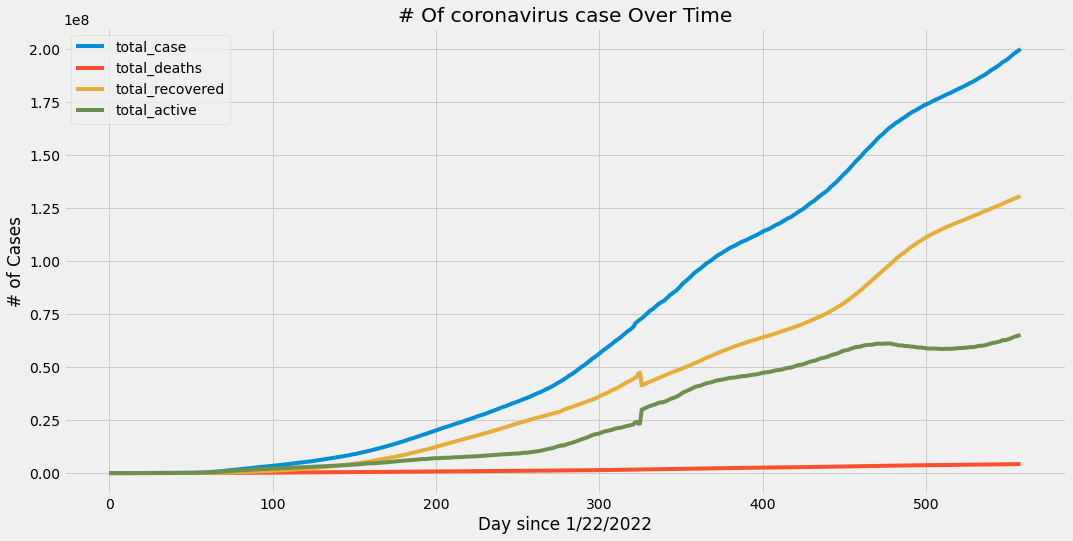

In [20]:
# Nhập code ở đây:
# số lượng của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày)
so_ngay = len(confirmed_df.columns.tolist()[5:-1])
tung_ngay = list(range(0,so_ngay))
x = tung_ngay

y1 = confirmed_df.iloc[:, 5:-1].sum()

y2 = deaths_df.iloc[:, 5:-1].sum()

y3 = recoveries_df.iloc[:, 5:-1].sum()

y4 = y1 - y2 - y3

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x,y1); 
ax.plot(x,y2); 
ax.plot(x,y3); 
ax.plot(x,y4);

plt.legend(['total_case', 'total_deaths','total_recovered','total_active'])

# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "# Of coronavirus case Over Time",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");


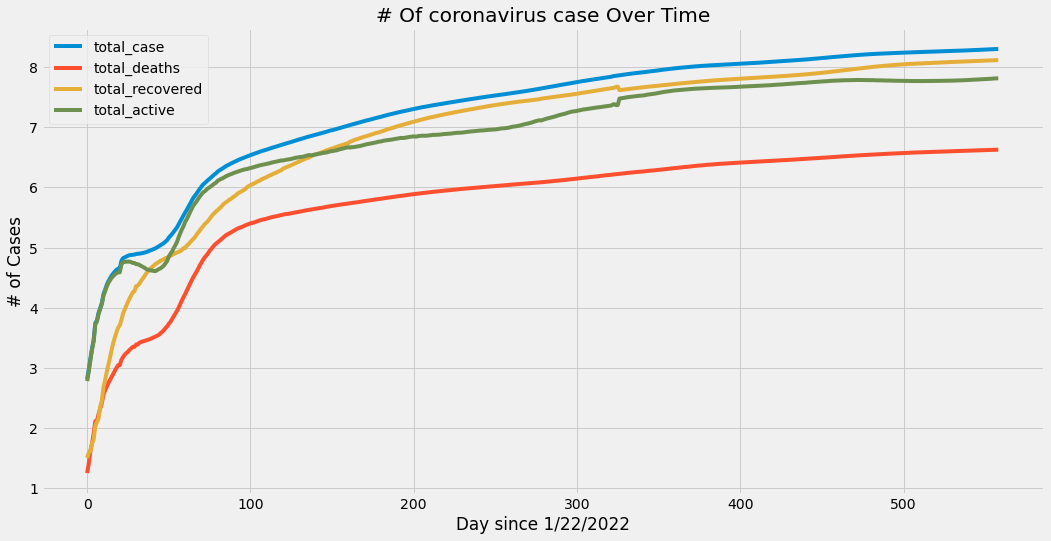

In [21]:
# log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày)
so_ngay = len(confirmed_df.columns.tolist()[5:-1])
tung_ngay = list(range(0,so_ngay))
x = tung_ngay

y1 = confirmed_df.iloc[:, 5:-1].sum()
y1_10 = np.log10(y1)

y2 = deaths_df.iloc[:, 5:-1].sum()
y2_10 = np.log10(y2)

y3 = recoveries_df.iloc[:, 5:-1].sum()
y3_10 = np.log10(y3)

y4 = (y1 - y2 - y3) 
y4_10 = np.log10(y4)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x,y1_10)
ax.plot(x,y2_10)
ax.plot(x,y3_10)
ax.plot(x,y4_10)

plt.legend(['total_case', 'total_deaths','total_recovered','total_active'])
# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "# Of coronavirus case Over Time",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");


## Bài toán 3
    Hiển thị tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) ở 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ đường.

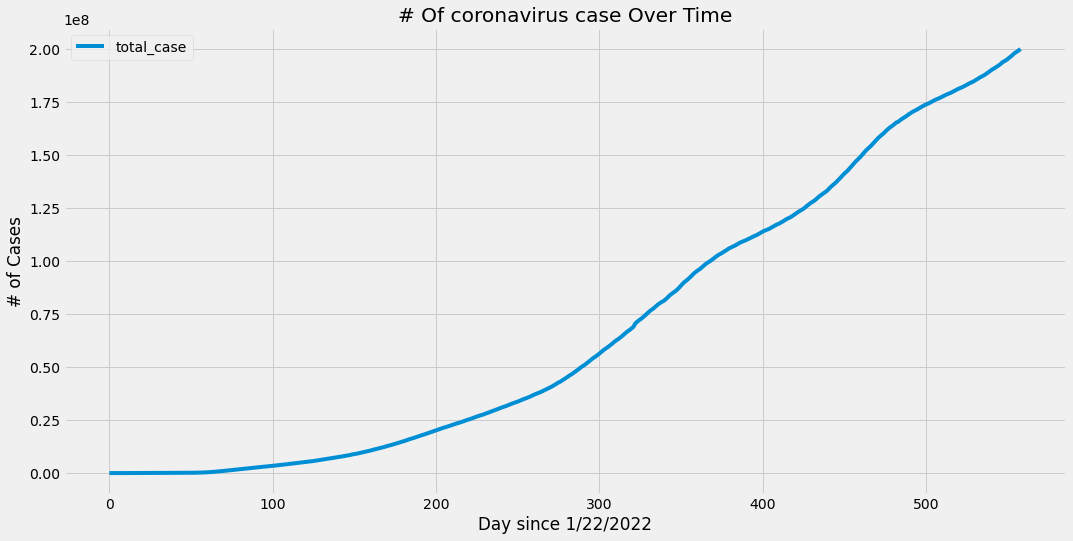

In [22]:
# Nhập code ở đây:
# số lượng của tổng số trường hợp Covid (đơn vị ngày)
so_ngay = len(confirmed_df.columns.tolist()[5:-1])
tung_ngay = list(range(so_ngay))
x = tung_ngay

y1 = confirmed_df.iloc[:, 5:-1].sum()

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x,y1)
plt.legend(['total_case'])

# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "# Of coronavirus case Over Time",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");


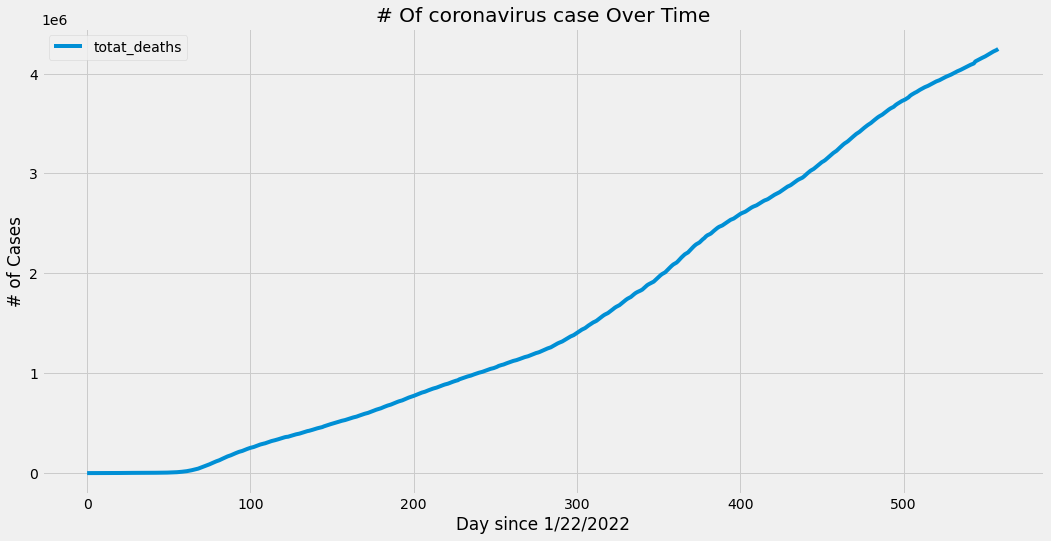

In [23]:
# Nhập code ở đây:
# số lượng của tổng số ca tử vong (đơn vị ngày)
so_ngay = len(deaths_df.columns.tolist()[5:-1])
tung_ngay = list(range(so_ngay))
x = tung_ngay

y2 = deaths_df.iloc[:, 5:-1].sum()

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x,y2)
plt.legend(['totat_deaths'])

# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "# Of coronavirus case Over Time",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");


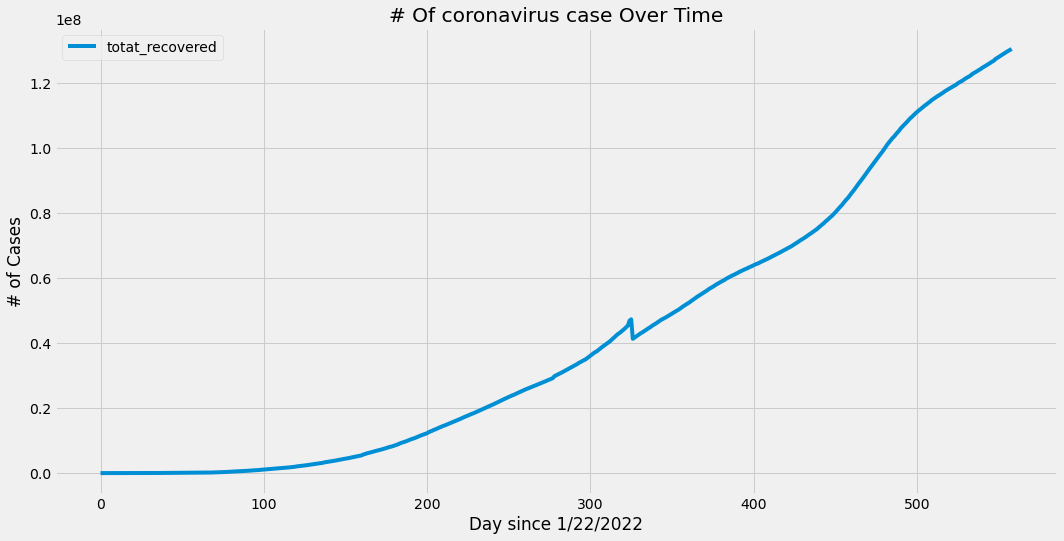

In [24]:
# Nhập code ở đây:
# số lượng của tổng số ca phục hồi (đơn vị ngày)
so_ngay = len(recoveries_df.columns.tolist()[5:-1])
tung_ngay = list(range(so_ngay))
x = tung_ngay

y3 = recoveries_df.iloc[:, 5:-1].sum()

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x,y3)
plt.legend(['totat_recovered'])

# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "# Of coronavirus case Over Time",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");

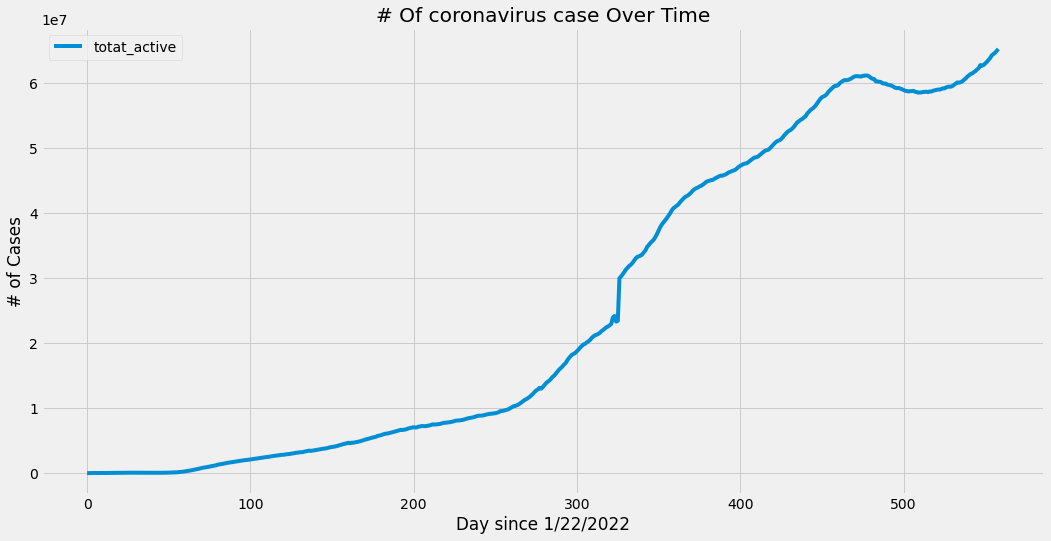

In [25]:
# Nhập code ở đây:
# số lượng của tổng số còn mắc Covid (đơn vị ngày)
so_ngay = len(recoveries_df.columns.tolist()[5:-1])
tung_ngay = list(range(so_ngay))
x = tung_ngay

y1 = confirmed_df.iloc[:, 5:-1].sum()
y2 = deaths_df.iloc[:, 5:-1].sum()
y3 = recoveries_df.iloc[:, 5:-1].sum()
y4 = y1-y2-y3

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x,y4)
plt.legend(['totat_active'])

# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "# Of coronavirus case Over Time",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");

## Bài toán 4
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày).

In [26]:
#Nhập code ở đây: 
# Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid
days = np.array(confirmed_df.columns[5:-1])

confirmed_case = np.array(confirmed_df.iloc[:, 4:-1].sum())
confirmed_diff = np.diff(confirmed_case)

increases_confirmed = np.stack((days, confirmed_diff), axis=1)
increases_confirmed


array([['1/23/20', 100],
       ['1/24/20', 287],
       ['1/25/20', 493],
       ...,
       ['8/1/21', 484270],
       ['8/2/21', 567551],
       ['8/3/21', 634095]], dtype=object)

In [27]:
#Nhập code ở đây: 
# Tính số lượng gia tăng hàng ngày về: tổng số ca tử vong
days = np.array(deaths_df.columns[5:-1])

deaths_case = np.array(deaths_df.iloc[:, 4:-1].sum())
deaths_diff = np.diff(deaths_case)

increases_deaths = np.stack((days, deaths_diff), axis=1)
increases_deaths

array([['1/23/20', 1],
       ['1/24/20', 8],
       ['1/25/20', 16],
       ...,
       ['8/1/21', 7371],
       ['8/2/21', 8053],
       ['8/3/21', 10419]], dtype=object)

In [28]:
# Tính số lượng gia tăng hàng ngày về: tổng số ca phục hồi 
days = np.array(recoveries_df.columns[5:-1])

recoveries_case = np.array(recoveries_df.iloc[:, 4:-1].sum())
recoveries_diff = np.diff(recoveries_case)

increases_recoveries = np.stack((days, recoveries_diff), axis=1)
increases_recoveries


array([['1/23/20', 2],
       ['1/24/20', 7],
       ['1/25/20', 3],
       ...,
       ['8/1/21', 289178],
       ['8/2/21', 283144],
       ['8/3/21', 304468]], dtype=object)

In [29]:
# Tính số lượng gia tăng hàng ngày về: tổng số ca còn mắc Covid 
days = np.array(confirmed_df.columns[5:-1])

confirmed_case = np.array(confirmed_df.iloc[:, 4:-1].sum())
deaths_case = np.array(deaths_df.iloc[:, 4:-1].sum())
recoveries_case = np.array(recoveries_df.iloc[:, 4:-1].sum())

active = (confirmed_case) - (deaths_case) - (recoveries_case)

active_diff = np.diff(active)

kq_active = np.stack((days, active_diff), axis=1)
kq_active


array([['1/23/20', 97],
       ['1/24/20', 272],
       ['1/25/20', 474],
       ...,
       ['8/1/21', 187721],
       ['8/2/21', 276354],
       ['8/3/21', 319208]], dtype=object)

## Bài toán 5
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày ở 4 biểu đồ riêng biệt).

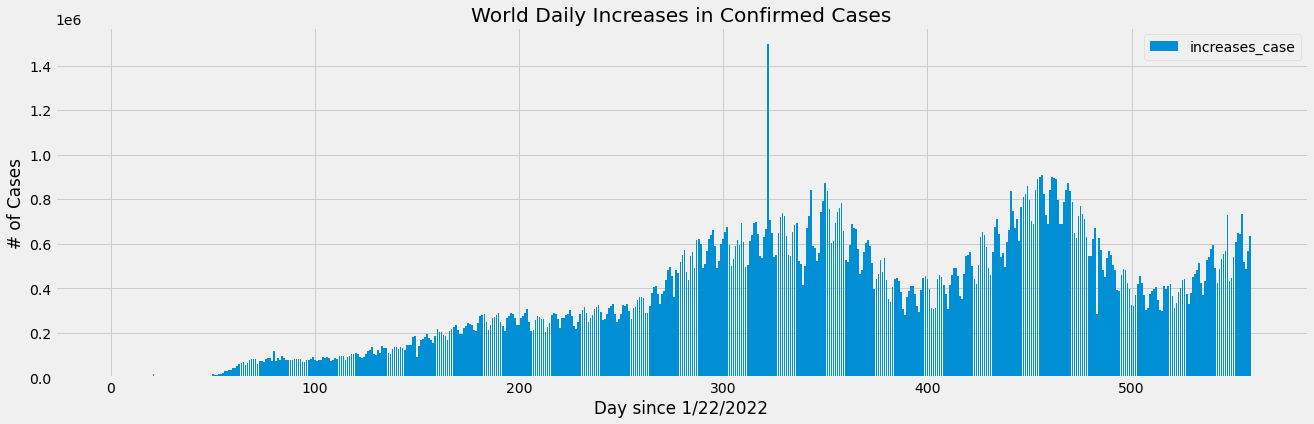

In [30]:
#Nhập code ở đây: 
# Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid
so_ngay = len(confirmed_df.columns.tolist()[5:-1])
tung_ngay = list(range(1,so_ngay))
x = tung_ngay

confirmed_case = np.array(confirmed_df.iloc[:,5:-1].sum())
confirmed_diff = np.diff(confirmed_case)
y1 = list(confirmed_diff)

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(x,y1);
plt.legend(['increases_case'])

# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "World Daily Increases in Confirmed Cases",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");


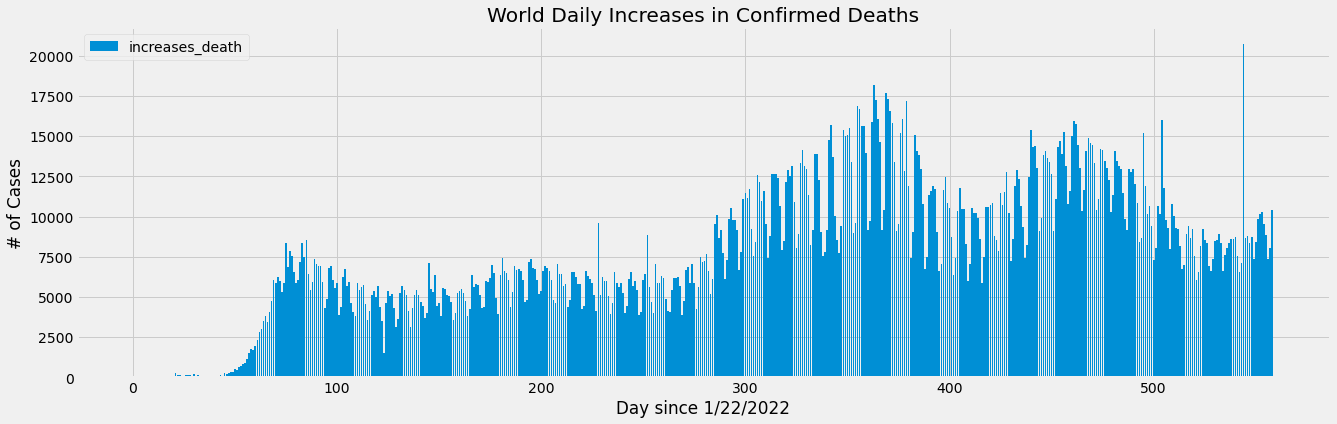

In [31]:
#Nhập code ở đây: 
# Tính số lượng gia tăng hàng ngày về: tổng số ca tử vong
so_ngay = len(deaths_df.columns.tolist()[5:-1])
tung_ngay = list(range(1,so_ngay))
x = tung_ngay

deaths_case = np.array(deaths_df.iloc[:,5:-1].sum())
deaths_diff = np.diff(deaths_case)
y2 = list(deaths_diff)

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(x,y2);
plt.legend(['increases_death'])

# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "World Daily Increases in Confirmed Deaths",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");

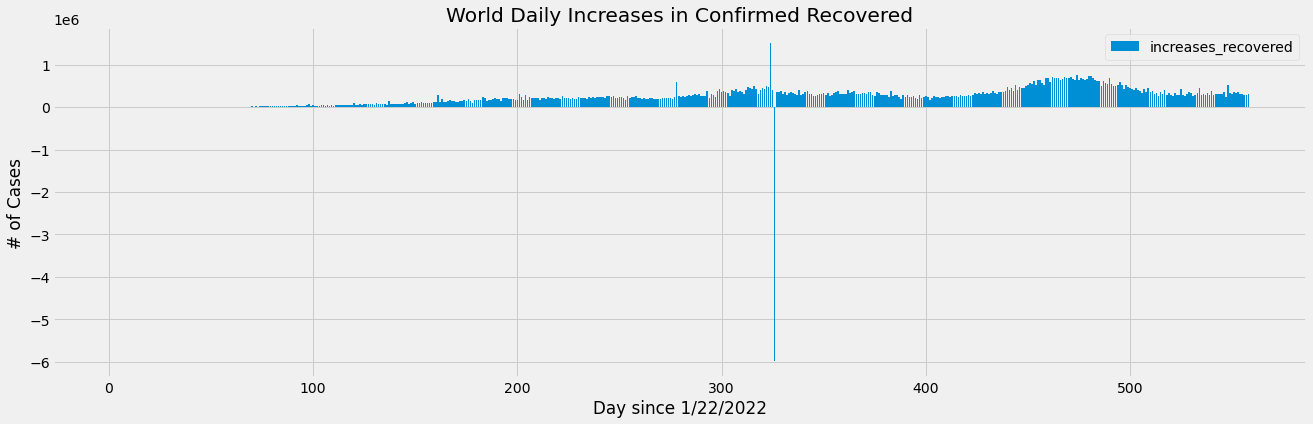

In [32]:
#Nhập code ở đây: 
# Tính số lượng gia tăng hàng ngày về: tổng số ca phục hồi
so_ngay = len(recoveries_df.columns.tolist()[5:-1])
tung_ngay = list(range(1,so_ngay))
x = tung_ngay

recoveries_case = np.array(recoveries_df.iloc[:,5:-1].sum())
recoveries_diff = np.diff(recoveries_case)
y3 = list(recoveries_diff)

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(x,y3);
plt.legend(['increases_recovered'])

# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "World Daily Increases in Confirmed Recovered",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");

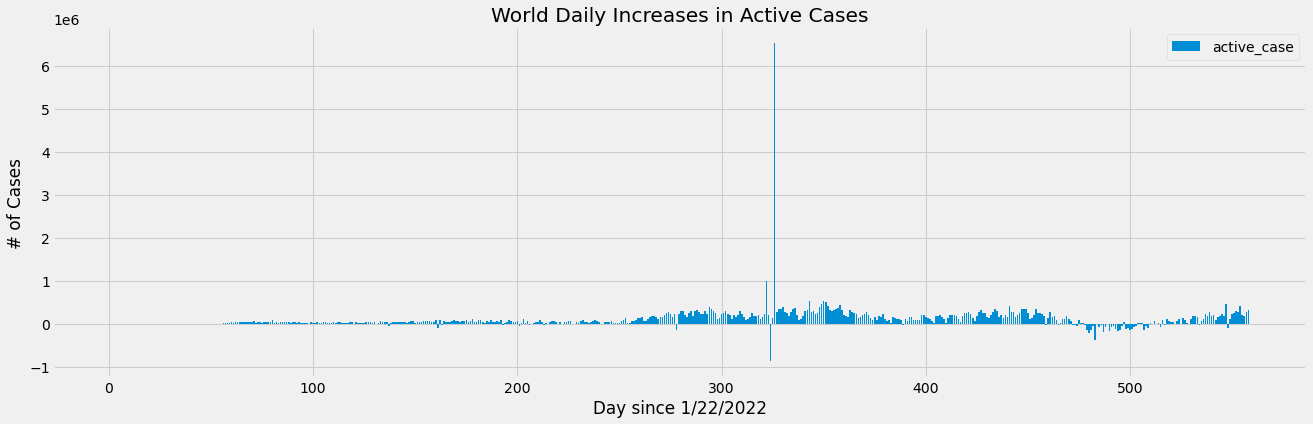

In [33]:
#Nhập code ở đây:
# Tính số lượng gia tăng hàng ngày về: tổng số còn ca mắc Covid
so_ngay = len(confirmed_df.columns.tolist()[5:-1])
tung_ngay = list(range(1,so_ngay))
x = tung_ngay

confirmed_case = np.array(confirmed_df.iloc[:,5:-1].sum())
deaths_case = np.array(deaths_df.iloc[:,5:-1].sum())
recoveries_case = np.array(recoveries_df.iloc[:,5:-1].sum())

active = confirmed_case - deaths_case - recoveries_case
active_diff = np.diff(active)
y_4 = list(active_diff)

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(x,y_4);
plt.legend(['active_case'])

# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "World Daily Increases in Active Cases",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");

## Bài toán 6
    Tính phần trăm tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo thời gian.

In [34]:
#Nhập code ở đây:
# Tính phần trăm tỷ lệ tử vong toàn cầu theo thời gian : 

confirmed_case = confirmed_df.iloc[:, 5:-1].sum()
a = np.array(confirmed_case)

deaths_case = deaths_df.iloc[:, 5:-1].sum()
b = np.array(deaths_case)

tyle_tuvong = []
for num_1, num_2 in zip(b, a):
    tyle_tuvong.append(round(num_1*100/num_2,2))
# print(tyle_tuvong)

days = np.array(confirmed_df.columns[5:-1])

tyle_tuvong_theongay = np.stack((days, tyle_tuvong), axis=1)
tyle_tuvong_theongay


array([['1/23/20', 2.74],
       ['1/24/20', 2.75],
       ['1/25/20', 2.92],
       ...,
       ['8/1/21', 2.13],
       ['8/2/21', 2.12],
       ['8/3/21', 2.12]], dtype=object)

In [35]:
# Tính phần trăm tỷ lệ tỷ lệ hồi phục theo thời gian : 

In [36]:
confirmed_case = confirmed_df.iloc[:, 5:-1].sum()
a = np.array(confirmed_case)

recoveries_case = recoveries_df.iloc[:, 5:-1].sum()
b = np.array(recoveries_case)

tyle_phuchoi = []
for num_1, num_2 in zip(b, a):
    tyle_phuchoi.append(round(num_1*100/num_2,2))
# print(tyle_phuchoi)

days = np.array(confirmed_df.columns[5:-1])

tyle_phuchoi_theongay = np.stack((days, tyle_phuchoi), axis=1)
tyle_phuchoi_theongay


array([['1/23/20', 4.87],
       ['1/24/20', 4.13],
       ['1/25/20', 2.92],
       ...,
       ['8/1/21', 65.37],
       ['8/2/21', 65.32],
       ['8/3/21', 65.27]], dtype=object)

## Bài toán 7
**7.1** 

    Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

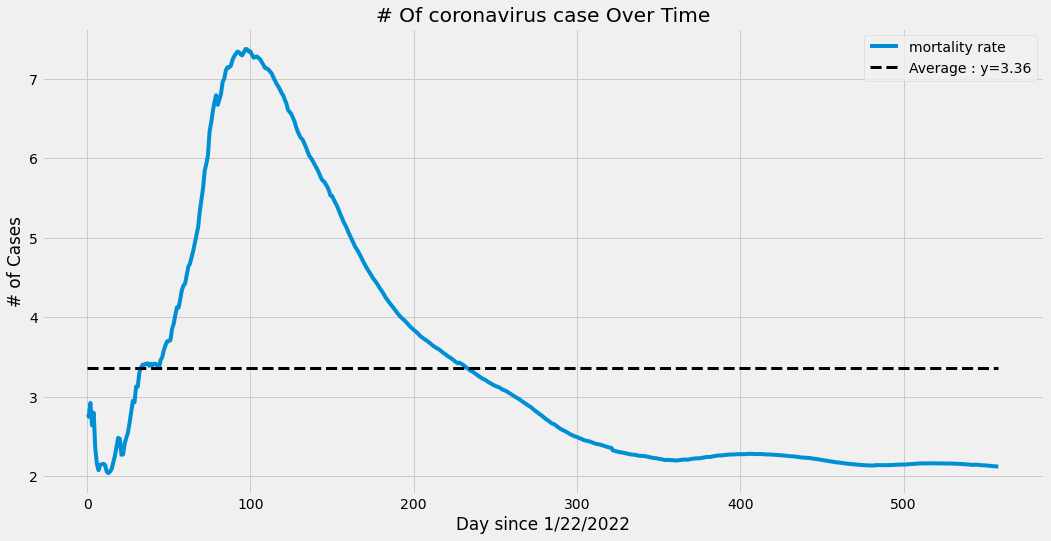

In [37]:
#Nhập code ở đây: 
# Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường :

confirmed_case = confirmed_df.iloc[:, 5:-1].sum()
a = np.array(confirmed_case)

deaths_case = deaths_df.iloc[:, 5:-1].sum()
b = np.array(deaths_case)

tyle_tuvong = []
for num_1, num_2 in zip(b, a):
    tyle_tuvong.append(num_1*100/num_2)
# print(tyle_tuvong)
y = tyle_tuvong

so_ngay = len(confirmed_df.columns.tolist()[5:-1])
tung_ngay = list(range(so_ngay))
x = tung_ngay

# Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian :
import numpy 
y_mean = numpy.mean(y)
ym = [y_mean] * so_ngay
# ym # = 3.36
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x,y)
ax.plot(x, ym, color='black', linewidth=3, linestyle="--")

plt.legend(['mortality rate', 'Average : y=3.36'])
# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "# Of coronavirus case Over Time",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");


**7.2** 

    Hiển thị tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ phục hồi trung bình theo thời gian.

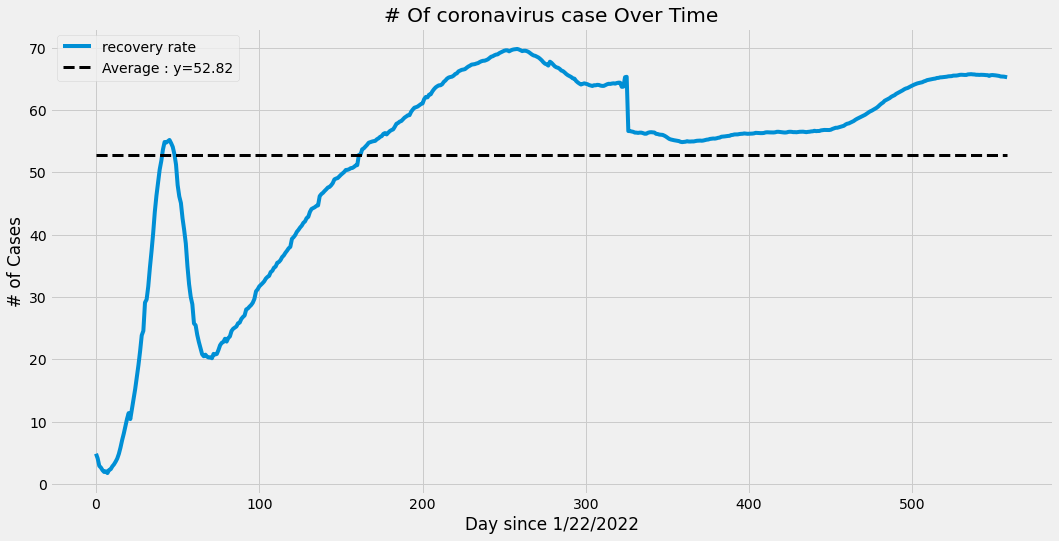

In [38]:
#Nhập code ở đây: 
# Hiển thị tỷ lệ phục hồi theo thời gian (đơn vị ngày) bằng biểu đồ đường :

confirmed_case = confirmed_df.iloc[:, 5:-1].sum()
a = np.array(confirmed_case)

recoveries_case = recoveries_df.iloc[:, 5:-1].sum()
b = np.array(recoveries_case)

tyle_phuchoi = []
for num_1, num_2 in zip(b, a):
    tyle_phuchoi.append(num_1*100/num_2)
# print(tyle_phuchoi)
y = tyle_phuchoi

so_ngay = len(confirmed_df.columns.tolist()[5:-1])
tung_ngay = list(range(so_ngay))
x = tung_ngay

# Sử dụng đường gạch ngang để hiển thị tỷ phục hồi vong trung bình theo thời gian :
import numpy 
y_mean = numpy.mean(y)
ym = [y_mean] * so_ngay
# ym   # 52.82
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x,y)
ax.plot(x, ym, color='black', linewidth=3, linestyle="--")

plt.legend(['recovery rate', 'Average : y=52.82'])
# Ghi chú tiêu đề, trục x, trục y :
ax.set(title = "# Of coronavirus case Over Time",
       xlabel = "Day since 1/22/2022",
       ylabel = "# of Cases");

#  6. Phân tích theo châu lục

## Tiền xử lý dữ liệu

In [39]:
# Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# nhận tất cả các quốc gia
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code thành Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Định nghĩa hàm để nhận continent code cho quốc gia.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


## Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [40]:
# Dữ liệu toàn cầu : chạy khi bắt đầu truy vấn
# Tạo df khác để không ảnh hưởng kết quả các câu trên

# confirmed_df2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_df2 = confirmed_df.iloc[:, 0:565]

# deaths_df2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths_df2 = deaths_df.iloc[:, 0:565]

# recoveries_df2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recoveries_df2 = recoveries_df.iloc[:, 0:565]
## 

In [41]:
# chạy khi bắt đầu truy vấn
confirmed_df2.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [42]:
# chạy khi bắt đầu truy vấn
deaths_df2.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [43]:
# chạy khi bắt đầu truy vấn
recoveries_df2.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'

In [44]:
# Phải chạy "Tiền xử lý dữ liệu" trước
cont_1 = [country_to_continent_code(i) for i in countries]
cont_2 = [cont_1.replace('NA', 'North America') for cont_1 in cont_1] 
cont_3 = [cont_2.replace('SA', 'South America') for cont_2 in cont_2]
cont_4 = [cont_3.replace('AS', 'Asia') for cont_3 in cont_3]
cont_5 = [cont_4.replace('OC', 'Australia') for cont_4 in cont_4]
cont_6 = [cont_5.replace('AF', 'Africa') for cont_5 in cont_5]
cont_7 = [cont_6.replace('EU', 'Europe') for cont_6 in cont_6]
cont_8 = [cont_7.replace('na', 'Others') for cont_7 in cont_7]

print(cont_8)

['Asia', 'Europe', 'Africa', 'Europe', 'Africa', 'Others', 'North America', 'South America', 'Asia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Europe', 'Asia', 'North America', 'Asia', 'Asia', 'North America', 'Europe', 'Europe', 'North America', 'Africa', 'Asia', 'South America', 'Europe', 'Africa', 'South America', 'Asia', 'Europe', 'Africa', 'Others', 'Africa', 'Africa', 'Asia', 'Africa', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'Africa', 'Africa', 'South America', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', '

In [45]:
# Nhập code ở đây:
# Thêm trường "continent" vào tập dữ liệu confirm_df2 :
# confirmed_df2.insert(1, "continient", [country_to_continent_code(i) for i in countries], True)

confirmed_df2.insert(2, "continent", cont_8, True)
confirmed_df2

# confirmed_df2.drop(columns =['abc']) 


Province/State        Country/Region continent        Lat        Long  \
0              NaN           Afghanistan      Asia  33.939110   67.709953   
1              NaN               Albania    Europe  41.153300   20.168300   
2              NaN               Algeria    Africa  28.033900    1.659600   
3              NaN               Andorra    Europe  42.506300    1.521800   
4              NaN                Angola    Africa -11.202700   17.873900   
..             ...                   ...       ...        ...         ...   
280            NaN    West Bank and Gaza    Others  31.952200   35.233200   
281            NaN  Winter Olympics 2022    Others  39.904200  116.407400   
282            NaN                 Yemen      Asia  15.552727   48.516388   
283            NaN                Zambia    Africa -13.133897   27.849332   
284            NaN              Zimbabwe    Africa -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...   144285   145008   
1          0        0        0        0        0  ...   132891   132922   
2          0        0        0        0        0  ...   163660   165204   
3          0        0        0        0        0  ...    14577    14586   
4          0        0        0        0        0  ...    41879    42110   
..       ...      ...      ...      ...      ...  ...      ...      ...   
280        0        0        0        0        0  ...   316088   316189   
281        0        0        0        0        0  ...        0        0   
282        0        0        0        0        0  ...     7012     7022   
283        0        0        0        0        0  ...   192316   192956   
284        0        0        0        0        0  ...    99944   101711   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     145552   145996   146523   147154  147501  147985  148572  148933  
1     132952   132999   133036   133081  133121  133146  133211  133310  
2     167131   168668   170189   171392  172564  173922  175229  176724  
3      14586    14655    14678    14678   14678   14747   14766   14797  
4      42288    42486    42646    42777   42815   42970   43070   43158  
..       ...      ...      ...      ...     ...     ...     ...     ...  
280   316328   316487   316603   316738  316861  317083  317264  317404  
281        0        0        0        0       0       0       0       0  
282     7027     7042     7058     7061    7070    7081    7086    7096  
283   193432   194140   195096   195816  196293  196490  197123  197791  
284   103567   105656   107490   108860  109546  110855  112435  113526  

[285 rows x 566 columns]

In [46]:
# Nhập code ở đây:
# Thêm trường "continent" vào tập dữ liệu deaths_df2 :

deaths_df2.insert(2, "continent", cont_8, True)
deaths_df2

Province/State        Country/Region continent        Lat        Long  \
0              NaN           Afghanistan      Asia  33.939110   67.709953   
1              NaN               Albania    Europe  41.153300   20.168300   
2              NaN               Algeria    Africa  28.033900    1.659600   
3              NaN               Andorra    Europe  42.506300    1.521800   
4              NaN                Angola    Africa -11.202700   17.873900   
..             ...                   ...       ...        ...         ...   
280            NaN    West Bank and Gaza    Others  31.952200   35.233200   
281            NaN  Winter Olympics 2022    Others  39.904200  116.407400   
282            NaN                 Yemen      Asia  15.552727   48.516388   
283            NaN                Zambia    Africa -13.133897   27.849332   
284            NaN              Zimbabwe    Africa -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...     6477     6515   
1          0        0        0        0        0  ...     2456     2456   
2          0        0        0        0        0  ...     4087     4112   
3          0        0        0        0        0  ...      127      127   
4          0        0        0        0        0  ...      991      994   
..       ...      ...      ...      ...      ...  ...      ...      ...   
280        0        0        0        0        0  ...     3599     3600   
281        0        0        0        0        0  ...        0        0   
282        0        0        0        0        0  ...     1373     1374   
283        0        0        0        0        0  ...     3295     3316   
284        0        0        0        0        0  ...     3173     3280   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0       6577     6615     6677     6708    6737    6774    6804    6836  
1       2457     2457     2457     2457    2457    2457    2457    2457  
2       4161     4189     4219     4254    4291    4329    4370    4404  
3        127      127      128      128     128     128     128     128  
4       1000     1003     1008     1011    1016    1018    1022    1026  
..       ...      ...      ...      ...     ...     ...     ...     ...  
280     3601     3601     3601     3603    3604    3609    3609    3609  
281        0        0        0        0       0       0       0       0  
282     1374     1374     1375     1375    1377    1378    1380    1380  
283     3338     3355     3376     3389    3406    3412    3422    3430  
284     3340     3421     3490     3532    3583    3635    3676    3711  

[285 rows x 566 columns]

In [47]:
# tạo list phù hợp để chạy cho dữ liệu recoveries row 270 :

list_3 = print(cont_8[:270])
list_3

['Asia', 'Europe', 'Africa', 'Europe', 'Africa', 'Others', 'North America', 'South America', 'Asia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Europe', 'Asia', 'North America', 'Asia', 'Asia', 'North America', 'Europe', 'Europe', 'North America', 'Africa', 'Asia', 'South America', 'Europe', 'Africa', 'South America', 'Asia', 'Europe', 'Africa', 'Others', 'Africa', 'Africa', 'Asia', 'Africa', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'Africa', 'Africa', 'South America', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', '

In [48]:
# Nhập code ở đây:
# Thêm trường "continent" vào tập dữ liệu recoveries_df2 : code khong chay

recoveries_df2.insert(2, "continent", list_3, True) 
recoveries_df2

Province/State        Country/Region continent        Lat        Long  \
0              NaN           Afghanistan      None  33.939110   67.709953   
1              NaN               Albania      None  41.153300   20.168300   
2              NaN               Algeria      None  28.033900    1.659600   
3              NaN               Andorra      None  42.506300    1.521800   
4              NaN                Angola      None -11.202700   17.873900   
..             ...                   ...       ...        ...         ...   
265            NaN    West Bank and Gaza      None  31.952200   35.233200   
266            NaN  Winter Olympics 2022      None  39.904200  116.407400   
267            NaN                 Yemen      None  15.552727   48.516388   
268            NaN                Zambia      None -13.133897   27.849332   
269            NaN              Zimbabwe      None -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...    82586    82586   
1          0        0        0        0        0  ...   130152   130166   
2          0        0        0        0        0  ...   111322   112050   
3          0        0        0        0        0  ...    14077    14113   
4          0        0        0        0        0  ...    35686    35742   
..       ...      ...      ...      ...      ...  ...      ...      ...   
265        0        0        0        0        0  ...   311526   311560   
266        0        0        0        0        0  ...        0        0   
267        0        0        0        0        0  ...     4166     4168   
268        0        0        0        0        0  ...   182665   183534   
269        0        0        0        0        0  ...    67827    70496   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0      82586    82586    82586    82586   82586   82586   82586   82586  
1     130174   130187   130205   130222  130243  130256  130291  130314  
2     112900   113707   114531   115276  116009  116770  117557  118409  
3      14113    14180    14210    14210   14210   14296   14348   14380  
4      35964    36025    36708    37255   37397   38360   39389   39582  
..       ...      ...      ...      ...     ...     ...     ...     ...  
265   311622   311714   311772   311832  311918  312149  312289  312320  
266        0        0        0        0       0       0       0       0  
267     4168     4171     4171     4185    4200    4212    4232    4251  
268   183957   185210   186211   187236  188106  188950  189341  189658  
269    71383    73394    74562    75856   76665   79420   81570   82994  

[270 rows x 566 columns]

In [49]:
recoveries_df2.columns

Index(['Province/State', 'Country/Region', 'continent', 'Lat', 'Long',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       ...
       '7/26/21', '7/27/21', '7/28/21', '7/29/21', '7/30/21', '7/31/21',
       '8/1/21', '8/2/21', '8/3/21', '8/4/21'],
      dtype='object', length=566)

## Bài toán 9
    Tạo data frame country_df với chỉ mục là trường "Country/Region".
    Các cột thông tin này gồm:
    - continent: Châu lục.
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [50]:
#Nhập code ở đây:
time = list(confirmed_df.columns.values[4:564])
ls1 = list(confirmed_df2[time].iloc[0:, -1])
ls2 = list(deaths_df2[time].iloc[0:, -1])
ls3 = list(recoveries_df2[time].iloc[0:, -1])

pd_1 = pd.DataFrame({'Confirmed' : ls1, 'Deaths' : ls2})
pd_2 = pd.DataFrame({'Country/Region' : list(recoveries_df['Country/Region']), 'Recoveries': ls3})

# xem lai vi tri cac cot
pd_1.insert(0, 'Country/Region', confirmed_df2.iloc[0:, 1])
pd_1.insert(1, 'Lat', confirmed_df2.iloc[0:,3])
pd_1.insert(2, 'Long', confirmed_df2.iloc[0:, 4])
pd_1.insert(3, 'Continents', confirmed_df2.iloc[0:, 2])

# pd_2_dup = pd_2.drop_duplicates(subset = 'Country/Region')

countries_df = pd_1.merge(pd_2, how = 'left', on = 'Country/Region')
countries_df['Active'] = countries_df['Confirmed'] - countries_df['Deaths'] - countries_df['Recoveries']
countries_df['Mortality Rate (%)'] = (countries_df['Deaths'] / countries_df['Confirmed'])*100
countries_df = countries_df.round({'Mortality Rate (%)' : 2})
countries_df

Country/Region        Lat        Long Continents  Confirmed  \
0              Afghanistan  33.939110   67.709953       Asia     148572   
1                  Albania  41.153300   20.168300     Europe     133211   
2                  Algeria  28.033900    1.659600     Africa     175229   
3                  Andorra  42.506300    1.521800     Europe      14766   
4                   Angola -11.202700   17.873900     Africa      43070   
...                    ...        ...         ...        ...        ...   
1800    West Bank and Gaza  31.952200   35.233200     Others     317264   
1801  Winter Olympics 2022  39.904200  116.407400     Others          0   
1802                 Yemen  15.552727   48.516388       Asia       7086   
1803                Zambia -13.133897   27.849332     Africa     197123   
1804              Zimbabwe -19.015438   29.154857     Africa     112435   

      Deaths  Recoveries  Active  Mortality Rate (%)  
0       6804       82586   59182                4.58  
1       2457      130291     463                1.84  
2       4370      117557   53302                2.49  
3        128       14348     290                0.87  
4       1022       39389    2659                2.37  
...      ...         ...     ...                 ...  
1800    3609      312289    1366                1.14  
1801       0           0       0                 NaN  
1802    1380        4232    1474               19.48  
1803    3422      189341    4360                1.74  
1804    3676       81570   27189                3.27  

[1805 rows x 9 columns]

## Bài toán 10
    Tạo data frame continents_df với chỉ mục là trường "continent".
    Các cột thông tin này gồm: 
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [51]:
#Nhập code ở đây:
continents_df = countries_df[['Continents', 'Confirmed', 'Deaths', 'Recoveries', 'Active']].groupby('Continents').sum()
continents_df['Mortality Rate (%)'] = (continents_df['Deaths']/continents_df['Confirmed']) * 100
continents_df = continents_df.round({'Mortality Rate (%)' : 2})
continents_df

Confirmed   Deaths  Recoveries     Active  Mortality Rate (%)
Continents                                                                  
Africa           6810421   172864     5916462     721095                2.54
Asia            66076252  1058560    60942631    4075061                1.60
Australia         337013     7922      226083     103008                2.35
Europe         206619594  4143056    33515988  168960550                2.01
North America   42199847   924383    26831481   14443983                2.19
Others            749083    16292      649566      83225                2.17
South America   35655056  1094300    32630980    1929776                3.07

## Mẫu biểu đồ đường
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp mắc Covid theo thời gian ở mỗi lục địa/quốc gia:

In [52]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Vẽ Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Trục y
    plt.yscale(scale)
    plt.minorticks_on()
    # Vẽ các nhãn theo trục
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_5(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ các nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ các tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend 
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def visualize_covid_cases_7(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()        


## Bài toán 11
**11.1** 

    Áp dụng hàm visual_covid_case để hiển thị trực quan hóa của 7 lục địa trong 7 biểu đồ đường riêng biệt. Thứ tự của các trực quan hóa được sắp xếp theo thứ tự giảm dần theo số ca mắc được xác nhận. 
    

'NA': 'North America',
'SA': 'South America', 
'AS': 'Asia',
'OC': 'Australia',
'AF': 'Africa',
'EU' : 'Europe',
'na' : 'Others'

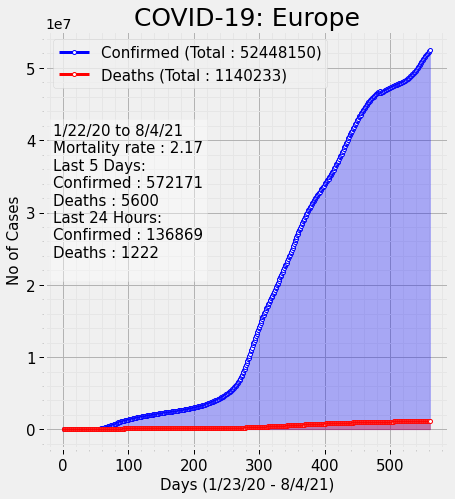

In [53]:
#Nhập code ở đây:
visualize_covid_cases_5(confirmed_df2,deaths_df2,continent = 'Europe')

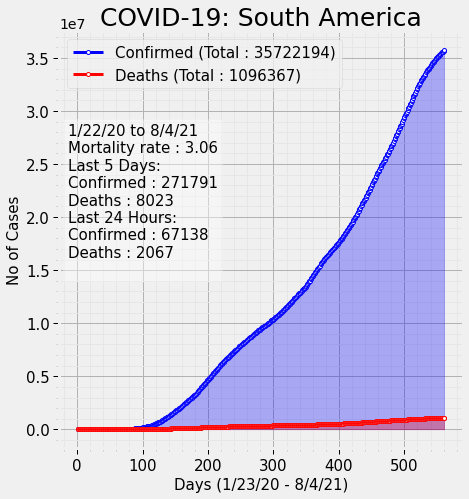

In [54]:
visualize_covid_cases_5(confirmed_df2,deaths_df2,continent = 'South America')

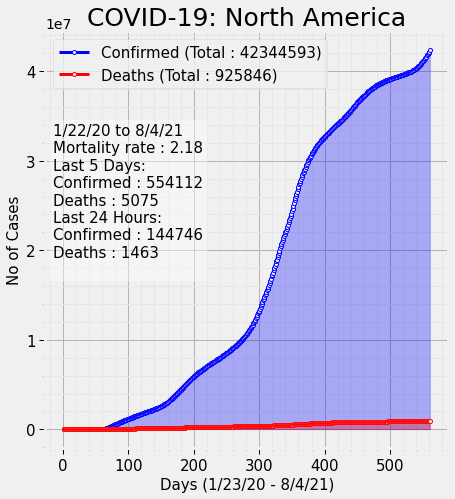

In [55]:
visualize_covid_cases_5(confirmed_df2,deaths_df2,continent = 'North America')

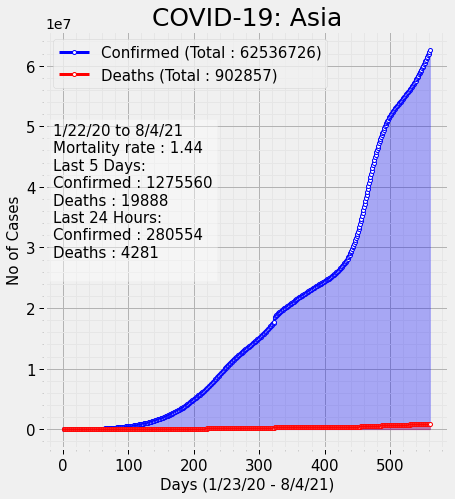

In [56]:
visualize_covid_cases_5(confirmed_df2,deaths_df2,continent = 'Asia')

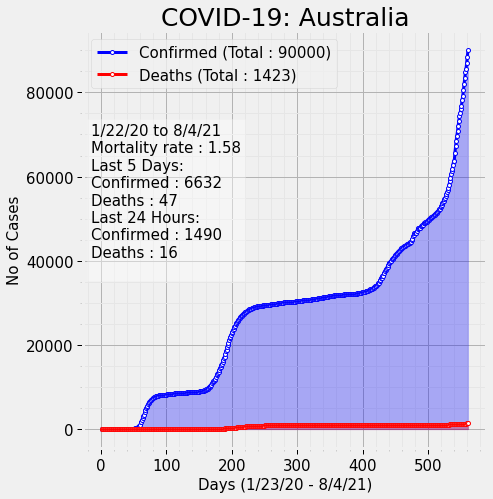

In [57]:
visualize_covid_cases_5(confirmed_df2,deaths_df2,continent = 'Australia')

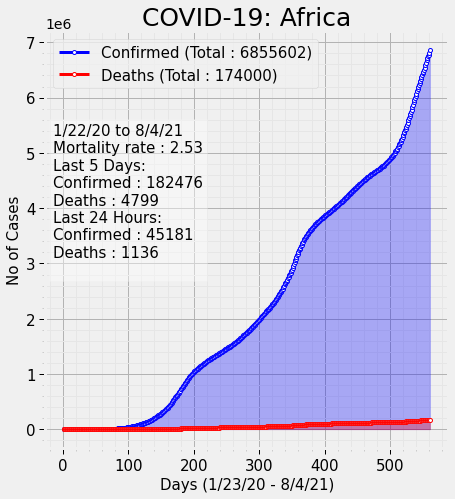

In [58]:
visualize_covid_cases_5(confirmed_df2,deaths_df2,continent = 'Africa')

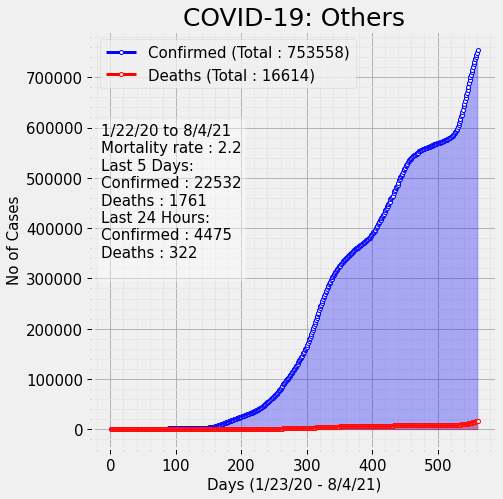

In [59]:
visualize_covid_cases_5(confirmed_df2,deaths_df2,continent = 'Others')


**11.2**

    Sửa đổi hàm "plot_params" và "visual_covid_case" thành:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
    - Thêm "Recoveries line" vào biểu đồ chính.
    - Thêm số "Total Recoveries" vào bảng nhỏ
    - Thêm "Recoveries" được điền trong 7 ngày và 24 giờ qua vào menu thông tin.

In [60]:
#Nhập code ở đây:


## Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

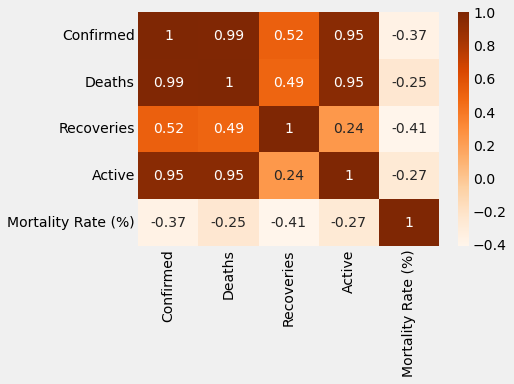

In [61]:
#Nhập code ở đây:
dataplot = sns.heatmap(continents_df.corr(), cmap = 'Oranges', annot = True)
plt.show()

## Bài toán 13
    Xây dựng biểu đồ tròn để so sánh tỷ lệ số ca mắc được xác nhận, số ca tử vong, số ca phục hồi và số ca vẫn còn mắc của 7 châu lục.
    Mỗi trường (confirm, deaths, ...) nên được trình bày trong các biểu đồ tròn khác nhau.
    Bạn không được sử dụng đoạn code lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi châu lục nên được trình bày bằng các màu sắc khác nhau.

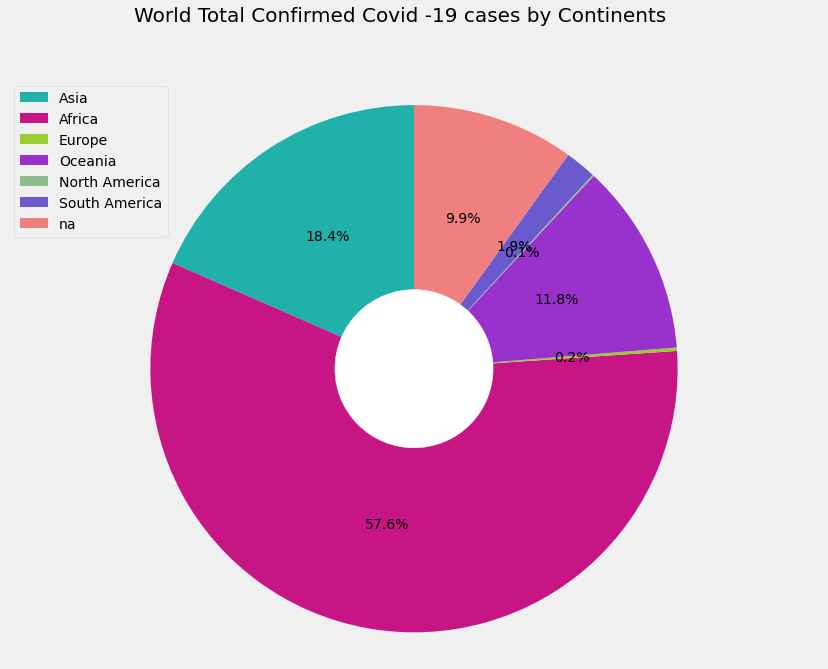

In [62]:
#Nhập code ở đây:
the_6 = ['Asia', 'Africa','Europe','Oceania', 'North America', 'South America','na', ]
df13 = continents_df.sort_values('Mortality Rate (%)', ascending = True)

data_confirmed     = list(round((df13.iloc[0:,0])))
data_deaths        = list(round((df13.iloc[0:,1])))
data_recoveries    = list(round((df13.iloc[0:,2])))
data_active        = list(round((df13.iloc[0:,3])))

plt.figure(figsize = (13,10))
the_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_confirmed, autopct='%1.1f%%',startangle=90, colors = ['lightseagreen','mediumvioletred','yellowgreen', 'darkorchid','darkseagreen','slateblue','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(the_circle)
plt.suptitle('World Total Confirmed Covid -19 cases by Continents', fontsize = 20)
plt.legend(the_6)
plt.show()

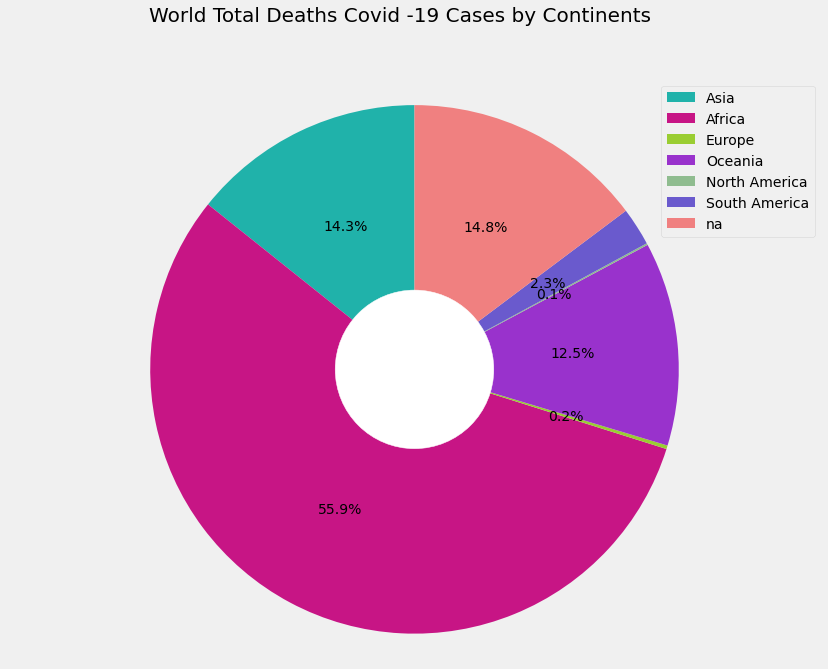

In [63]:
plt.figure(figsize = (13,10))
the_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_deaths, autopct='%1.1f%%',startangle=90, colors = ['lightseagreen','mediumvioletred','yellowgreen', 'darkorchid','darkseagreen','slateblue','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(the_circle)
plt.suptitle('World Total Deaths Covid -19 Cases by Continents', fontsize = 20)
plt.legend(the_6)
plt.show()

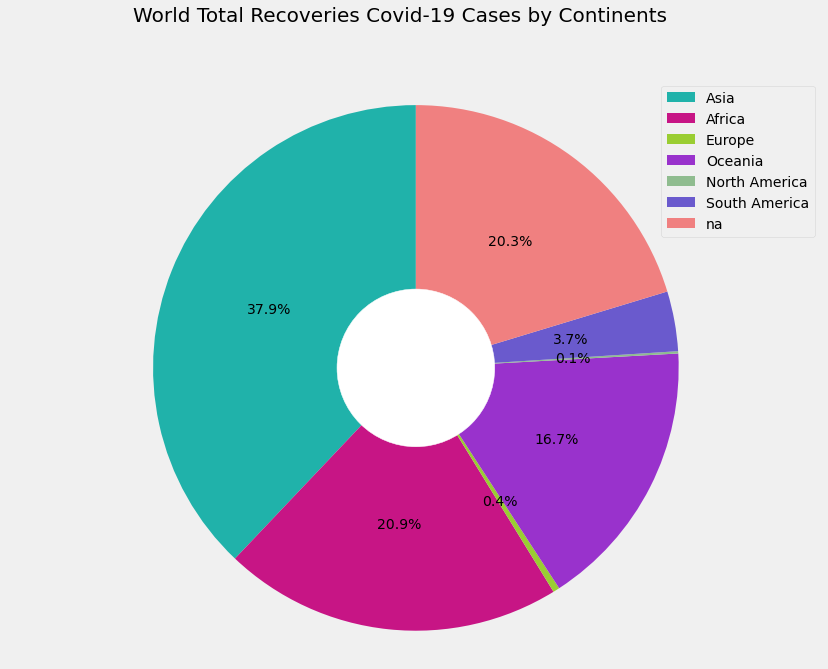

In [64]:
plt.figure(figsize = (13,10))
the_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_recoveries, autopct='%1.1f%%',startangle=90, colors = ['lightseagreen','mediumvioletred','yellowgreen', 'darkorchid','darkseagreen','slateblue','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(the_circle)
plt.suptitle('World Total Recoveries Covid-19 Cases by Continents', fontsize = 20)
plt.legend(the_6)
plt.show()

# 7. Phân tích theo quốc gia

## Bài toán 14
    Xây dựng bản đồ folium để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.


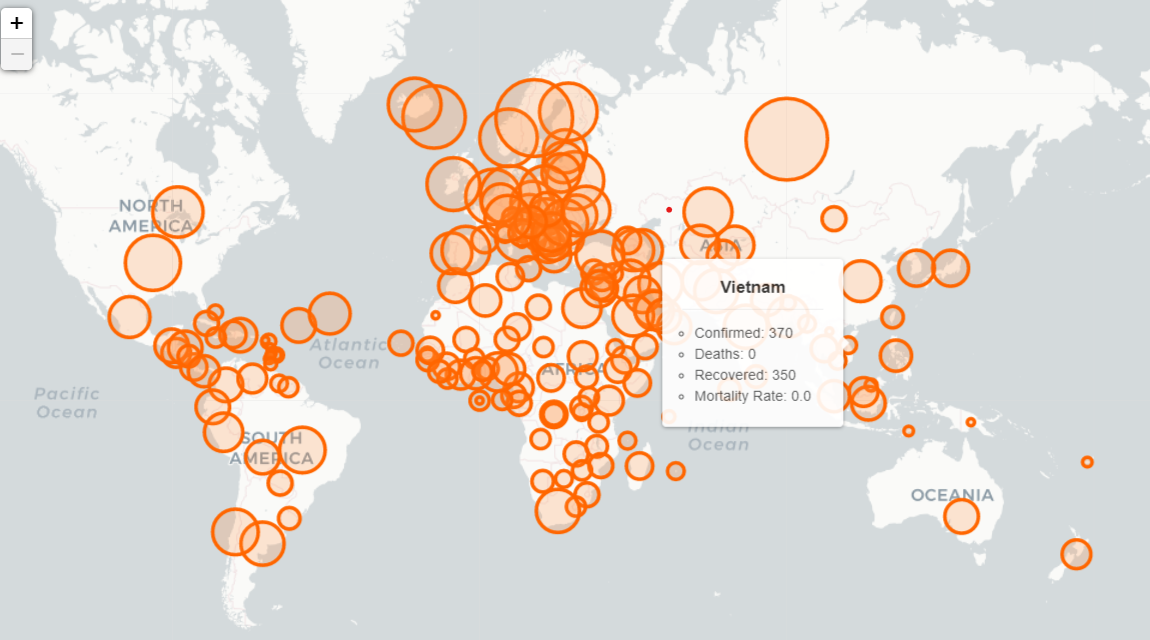

In [65]:
#Nhập code ở đây:
countries_df.dropna(subset=['Lat', 'Long'], how='all', inplace=True)
countries_df

Country/Region        Lat        Long Continents  Confirmed  \
0              Afghanistan  33.939110   67.709953       Asia     148572   
1                  Albania  41.153300   20.168300     Europe     133211   
2                  Algeria  28.033900    1.659600     Africa     175229   
3                  Andorra  42.506300    1.521800     Europe      14766   
4                   Angola -11.202700   17.873900     Africa      43070   
...                    ...        ...         ...        ...        ...   
1800    West Bank and Gaza  31.952200   35.233200     Others     317264   
1801  Winter Olympics 2022  39.904200  116.407400     Others          0   
1802                 Yemen  15.552727   48.516388       Asia       7086   
1803                Zambia -13.133897   27.849332     Africa     197123   
1804              Zimbabwe -19.015438   29.154857     Africa     112435   

      Deaths  Recoveries  Active  Mortality Rate (%)  
0       6804       82586   59182                4.58  
1       2457      130291     463                1.84  
2       4370      117557   53302                2.49  
3        128       14348     290                0.87  
4       1022       39389    2659                2.37  
...      ...         ...     ...                 ...  
1800    3609      312289    1366                1.14  
1801       0           0       0                 NaN  
1802    1380        4232    1474               19.48  
1803    3422      189341    4360                1.74  
1804    3676       81570   27189                3.27  

[1770 rows x 9 columns]

In [66]:
map_14 = folium.Map()

for s, lat, long, t, d, r, a in zip(
    list(countries_df['Country/Region']),
    list(countries_df['Lat']),
    list(countries_df['Long']),
    list(countries_df['Confirmed']) ,
    list(countries_df['Deaths']),
    list(countries_df['Recoveries']),
    list(countries_df['Mortality Rate (%)']) ):
    
    folium.Circle(
        location=[lat, long],
        popup=folium.Popup(( 
                 str(s) + '  '  + 
                 'Confirmed cases: ' + str(t) + ' ' + 
                 'Deaths cases: ' + str(d) + ' ' + 
                 'Recoveries cases: ' + str(r) +  ' ' + 
                 'Mortality rate (%): ' + str(a))),
        
        radius= t * 0.1,
        color='orange',
        fill=True,
        fill_color='orange'
    ).add_to(map_14)
    
map_14

## Bài toán 15
Xây dựng bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số ca còn mắc Covid của mỗi quốc gia trong log(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ".

In [67]:
#Nhập code ở đây:
pic_15 = px.choropleth(countries_df, 
                    locations = countries_df['Country/Region'], 
                    locationmode = 'country names' , 
                    color = np.log10(countries_df.Active), 
                    hover_data = ['Continents', 'Confirmed', 'Deaths', 'Recoveries', 'Active', 'Mortality Rate (%)'],
                    color_continuous_scale = 'spectral')
    
pic_15.update_layout( title = ' The Active Covid-19 Cases By Countries in Log(10) ')
pic_15.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

invalid value encountered in log10



## Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca được xác nhận.

In [101]:
QG_Group = countries_df.groupby('Country/Region')
kq_16a = QG_Group.first()
kq_16b = kq_16a.iloc[:,]

top10_country = kq_16b.sort_values('Confirmed', ascending=False).head(10)
top10_country

Lat        Long     Continents  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America   35351086  611778   
India           20.593684   78.962880           Asia   31769132  425757   
Brazil         -14.235000  -51.925300  South America   19993870  558872   
Russia          61.524010  105.318756         Europe    6251953  158263   
Turkey          38.963700   35.243300           Asia    5795665   51645   
Argentina      -38.416100  -63.616700  South America    4961880  106447   
Colombia         4.570900  -74.297300  South America    4807979  121216   
Spain           40.463667   -3.749220         Europe    4523310   81773   
Italy           41.871940   12.567380         Europe    4363374  128115   
Iran            32.427908   53.688046           Asia    3979727   91785   

                Recoveries    Active  Mortality Rate (%)  Death Rate %  \
Country/Region                                                           
USA                      0  34739308                1.73      8.247902   
India             30933022    410353                1.34      5.739994   
Brazil            17771228   1663770                2.80      7.534631   
Russia             5590137    503553                2.53      2.133679   
Turkey             5472089    271931                0.89      0.696270   
Argentina          4606026    249407                2.15      1.435103   
Colombia           4606139     80624                2.52      1.634217   
Spain               150376   4291161                1.81      1.102452   
Italy              4141043     94216                2.94      1.727228   
Iran               3424650    463292                2.31      1.237432   

                Active Rate %  Recoveries Rate %  
Country/Region                                    
USA                 18.143727           0.000000  
India                0.214320          19.429256  
Brazil               0.868958          11.162237  
Russia               0.262997           3.511206  
Turkey               0.142025           3.437059  
Argentina            0.130261           2.893078  
Colombia             0.042108           2.893149  
Spain                2.241198           0.094452  
Italy                0.049207           2.601019  
Iran                 0.241969           2.151048

## Bài toán 17
    Trực qua hóa 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau.

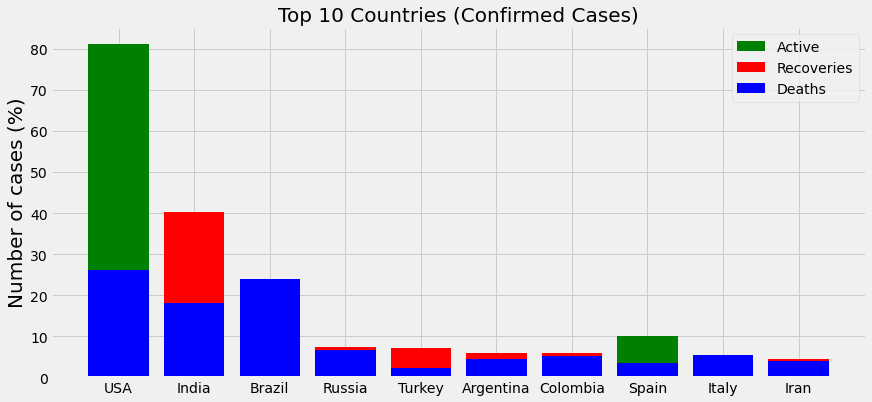

In [117]:
#Nhập code ở đây:

x = list(top10_country.index)

y_1 = list((top10_country['Active']     / top10_country['Active'].sum()) * 100 )
y_2 = list((top10_country['Recoveries'] / top10_country['Recoveries'].sum()) * 100)
y_3 = list((top10_country['Deaths']     / top10_country['Deaths'].sum()) * 100 )

plt.figure(figsize = (13,6))

plt.bar(x, y_1, color = 'green')
plt.bar(x, y_2, color = 'red')
plt.bar(x, y_3, color = 'blue')

plt.ylabel('Number of cases (%)', fontsize = 20)
plt.title('Top 10 Countries (Confirmed Cases)', fontsize = 20)
plt.legend(['Active', 'Recoveries', 'Deaths'])

plt.show()

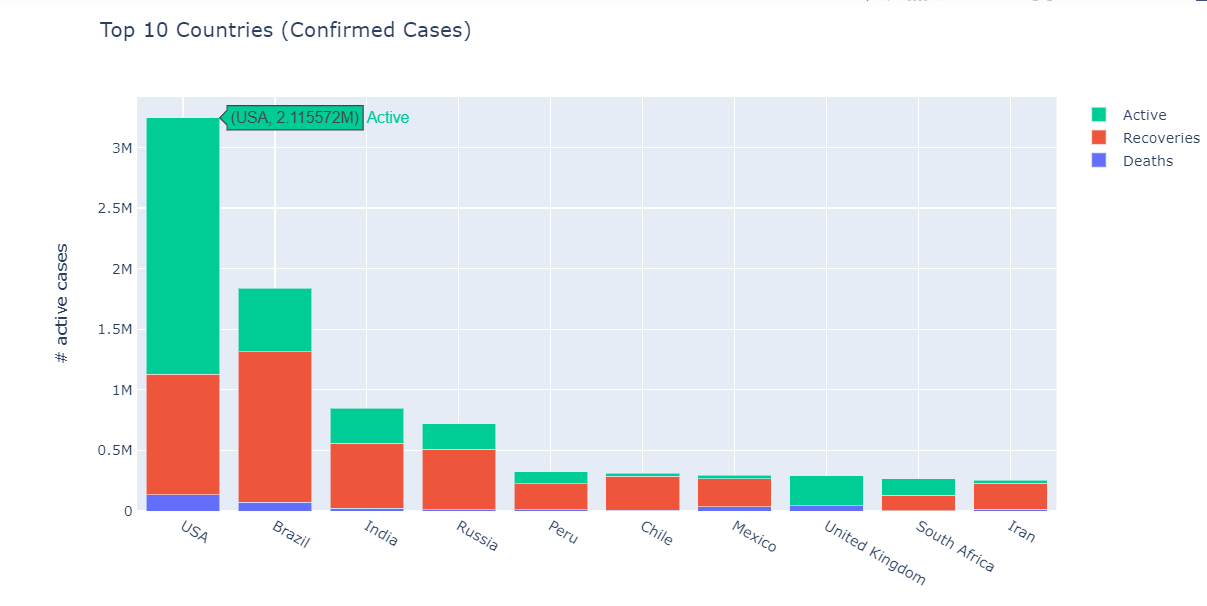

# 8. Phân tích nâng cao
 

## Bài toán 18
    Dựa trên dữ liệu trực quan toàn cầu, đại dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Bạn hãy trả lời ở đây:


#Trả lời :

Tính từ 22/1/2020 đến 4/8/2021, đồ thị line chart của 4 biểu đồ confirmed, deaths, active, recoveries hàng ngày đều vẫn đang tăng trưởng mạnh theo chiều dương và chưa cho thấy bất kỳ một tín hiệu nào là covid - 19 chững lại và đi xuống. 

Do đó, có thể nói rằng đại dịch Covid-19 có thể vẫn chưa đạt đỉnh dịch trên toàn cầu trong khoảng thời gian này.

## Bài toán 19
Dựa trên trực quan hóa dữ liệu của châu lục:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất theo các ca mắc của châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất theo số ca mắc của châu lục?
    
    19.3 Châu lục nào có tỷ lệ phục hồi cao nhất trong tập dữ liệu của các châu lục?

(Lưu ý: Tỷ lệ lan truyền COVID 2019 = Số lượng các ca mới được xác nhận trong 10 ngày qua / số ca mắc trước đó).
Bạn hãy trả lời ở đây:

In [118]:
round((continents_df.drop('Mortality Rate (%)', axis = 'columns') / continents_df.drop('Mortality Rate (%)', axis = 'columns').sum()) * 100,2)

Confirmed  Deaths  Recoveries  Active
Continents                                          
Africa              1.90    2.33        3.68    0.38
Asia               18.43   14.27       37.92    2.14
Australia           0.09    0.11        0.14    0.05
Europe             57.64   55.86       20.85   88.78
North America      11.77   12.46       16.70    7.59
Others              0.21    0.22        0.40    0.04
South America       9.95   14.75       20.30    1.01

19.1 Europe là châu lục có deaths rate lớn nhất chiếm ~ 56% trên tổng số 7 châu lục.

19.2 Europe là châu lục có tốc độ lây lan nhanh nhất chiếm ~ 58% trên tổng số các ca nhiễm hiện tại.

19.3 Asia là châu lục có tốc độ hồi phục tốt nhất chiếm ~ 38% trên tổng số các châu lục. 

## Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1 Quốc gia nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lây lan COVID 2019 cao nhất theo với tập dữ liệu của các quốc gia?
     
    20.3 Quốc gia nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia?
Bạn hãy trả lời ở đây:
<p><b>Trả lời:</b></p>

In [71]:
countries_df['Death Rate %'] = (countries_df['Deaths']/countries_df['Deaths'].sum()) * 100
countries_df['Active Rate %'] = (countries_df['Active']/countries_df['Active'].sum()) * 100
countries_df['Recoveries Rate %'] = (countries_df['Recoveries']/countries_df['Recoveries'].sum()) * 100

In [72]:
countries_df.sort_values('Death Rate %', ascending = False)

# 20.1 Mỹ là nước chiếm tỉ lệ tử vong cao nhất trên thế giới

Country/Region        Lat       Long     Continents  Confirmed  Deaths  \
1595            USA  40.000000 -100.00000  North America   35351086  611778   
87           Brazil -14.235000  -51.92530  South America   19993870  558872   
1464          India  20.593684   78.96288           Asia   31769132  425757   
1501         Mexico  23.634500 -102.55280  North America    2880409  241936   
1551           Peru  -9.190000  -75.01520  South America    2116652  196598   
...             ...        ...        ...            ...        ...     ...   
1121          China  31.692700   88.09240           Asia          1       0   
1120          China  31.692700   88.09240           Asia          1       0   
1119          China  31.692700   88.09240           Asia          1       0   
1118          China  31.692700   88.09240           Asia          1       0   
886           China  35.745200   95.99560           Asia         18       0   

      Recoveries    Active  Mortality Rate (%)  Death Rate %  Active Rate %  \
1595           0  34739308                1.73      8.247902      18.143727   
87      17771228   1663770                2.80      7.534631       0.868958   
1464    30933022    410353                1.34      5.739994       0.214320   
1501     2257443    381030                8.40      3.261746       0.199005   
1551     2083747   -163693                9.29      2.650506      -0.085494   
...          ...       ...                 ...           ...            ...   
1121          54       -53                0.00      0.000000      -0.000028   
1120         426      -425                0.00      0.000000      -0.000222   
1119         570      -569                0.00      0.000000      -0.000297   
1118         936      -935                0.00      0.000000      -0.000488   
886          633      -615                0.00      0.000000      -0.000321   

      Recoveries Rate %  
1595           0.000000  
87            11.162237  
1464          19.429256  
1501           1.417916  
1551           1.308817  
...                 ...  
1121           0.000034  
1120           0.000268  
1119           0.000358  
1118           0.000588  
886            0.000398  

[1770 rows x 12 columns]

In [119]:
countries_df.sort_values('Active Rate %', ascending = False)

# 20.2 Mỹ cũng là nước có tỉ lệ lây lan cao nhất 

Country/Region      Lat      Long     Continents  Confirmed  Deaths  \
1595            USA  40.0000 -100.0000  North America   35351086  611778   
1444         France  46.2276    2.2137         Europe    6084067  110941   
1441         France  46.2276    2.2137         Europe    6084067  110941   
1439         France  46.2276    2.2137         Europe    6084067  110941   
1446         France  46.2276    2.2137         Europe    6084067  110941   
...             ...      ...       ...            ...        ...     ...   
111          Canada  64.2823 -135.0000  North America        610       8   
107          Canada  46.5107  -63.4168  North America        208       0   
103          Canada  64.8255 -124.8457  North America        128       0   
99           Canada   0.0000    0.0000  North America         13       0   
98           Canada   0.0000    0.0000  North America          0       1   

      Recoveries    Active  Mortality Rate (%)  Death Rate %  Active Rate %  \
1595           0  34739308                1.73      8.247902      18.143727   
1444          26   5973100                1.82      1.495690       3.119645   
1441          58   5973068                1.82      1.495690       3.119628   
1439         104   5973022                1.82      1.495690       3.119604   
1446         438   5972688                1.82      1.495690       3.119429   
...          ...       ...                 ...           ...            ...   
111      1405529  -1404927                1.31      0.000108      -0.733769   
107      1405529  -1405321                0.00      0.000000      -0.733974   
103      1405529  -1405401                0.00      0.000000      -0.734016   
99       1405529  -1405516                0.00      0.000000      -0.734076   
98       1405529  -1405530                 inf      0.000013      -0.734083   

      Recoveries Rate %  
1595           0.000000  
1444           0.000016  
1441           0.000036  
1439           0.000065  
1446           0.000275  
...                 ...  
111            0.882823  
107            0.882823  
103            0.882823  
99             0.882823  
98             0.882823  

[1770 rows x 12 columns]

In [74]:
countries_df.sort_values('Recoveries Rate %', ascending = False)

# 20.3 Ấn độ là nước có tỉ lệ hồi phục cao nhất 

Country/Region        Lat        Long     Continents  Confirmed  Deaths  \
1464           India  20.593684   78.962880           Asia   31769132  425757   
87            Brazil -14.235000  -51.925300  South America   19993870  558872   
1557          Russia  61.524010  105.318756         Europe    6251953  158263   
1594          Turkey  38.963700   35.243300           Asia    5795665   51645   
1271        Colombia   4.570900  -74.297300  South America    4807979  121216   
...              ...        ...         ...            ...        ...     ...   
1668  United Kingdom  49.372300   -2.364400         Europe          0       0   
655            China  44.093500  113.944800           Asia        408       1   
34         Australia -27.469800  153.025100      Australia       1859       7   
1678  United Kingdom -51.796300  -59.523600         Europe         63       0   
995            China  31.202000  121.449100           Asia       2320       7   

      Recoveries   Active  Mortality Rate (%)  Death Rate %  Active Rate %  \
1464    30933022   410353                1.34      5.739994       0.214320   
87      17771228  1663770                2.80      7.534631       0.868958   
1557     5590137   503553                2.53      2.133679       0.262997   
1594     5472089   271931                0.89      0.696270       0.142025   
1271     4606139    80624                2.52      1.634217       0.042108   
...          ...      ...                 ...           ...            ...   
1668           0        0                 NaN      0.000000       0.000000   
655            0      407                0.25      0.000013       0.000213   
34             0     1852                0.38      0.000094       0.000967   
1678           0       63                0.00      0.000000       0.000033   
995            0     2313                0.30      0.000094       0.001208   

      Recoveries Rate %  
1464          19.429256  
87            11.162237  
1557           3.511206  
1594           3.437059  
1271           2.893149  
...                 ...  
1668           0.000000  
655            0.000000  
34             0.000000  
1678           0.000000  
995            0.000000  

[1770 rows x 12 columns]

## Bài toán 21
**USA dataset**

In [75]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [76]:
us_medical_data

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-07-07 04:34:13  32.3182   
1                     Alaska             US  2020-07-07 04:34:13  61.3707   
2             American Samoa             US  2020-07-07 04:34:13 -14.2710   
3                    Arizona             US  2020-07-07 04:34:13  33.7298   
4                   Arkansas             US  2020-07-07 04:34:13  34.9697   
5                 California             US  2020-07-07 04:34:13  36.1162   
6                   Colorado             US  2020-07-07 04:34:13  39.0598   
7                Connecticut             US  2020-07-07 04:34:13  41.5978   
8                   Delaware             US  2020-07-07 04:34:13  39.3185   
9           Diamond Princess             US  2020-07-07 04:34:13      NaN   
10      District of Columbia             US  2020-07-07 04:34:13  38.8974   
11                   Florida             US  2020-07-07 04:34:13  27.7663   
12                   Georgia             US  2020-07-07 04:34:13  33.0406   
13            Grand Princess             US  2020-07-07 04:34:13      NaN   
14                      Guam             US  2020-07-07 04:34:13  13.4443   
15                    Hawaii             US  2020-07-07 04:34:13  21.0943   
16                     Idaho             US  2020-07-07 04:34:13  44.2405   
17                  Illinois             US  2020-07-07 04:34:13  40.3495   
18                   Indiana             US  2020-07-07 04:34:13  39.8494   
19                      Iowa             US  2020-07-07 04:34:13  42.0115   
20                    Kansas             US  2020-07-07 04:34:13  38.5266   
21                  Kentucky             US  2020-07-07 04:34:13  37.6681   
22                 Louisiana             US  2020-07-07 04:34:13  31.1695   
23                     Maine             US  2020-07-07 04:34:13  44.6939   
24                  Maryland             US  2020-07-07 04:34:13  39.0639   
25             Massachusetts             US  2020-07-07 04:34:13  42.2302   
26                  Michigan             US  2020-07-07 04:34:13  43.3266   
27                 Minnesota             US  2020-07-07 04:34:13  45.6945   
28               Mississippi             US  2020-07-07 04:34:13  32.7416   
29                  Missouri             US  2020-07-07 04:34:13  38.4561   
30                   Montana             US  2020-07-07 04:34:13  46.9219   
31                  Nebraska             US  2020-07-07 04:34:13  41.1254   
32                    Nevada             US  2020-07-07 04:34:13  38.3135   
33             New Hampshire             US  2020-07-07 04:34:13  43.4525   
34                New Jersey             US  2020-07-07 04:34:13  40.2989   
35                New Mexico             US  2020-07-07 04:34:13  34.8405   
36                  New York             US  2020-07-07 04:34:13  42.1657   
37            North Carolina             US  2020-07-07 04:34:13  35.6301   
38              North Dakota             US  2020-07-07 04:34:13  47.5289   
39  Northern Mariana Islands             US  2020-07-07 04:34:13  15.0979   
40                      Ohio             US  2020-07-07 04:34:13  40.3888   
41                  Oklahoma             US  2020-07-07 04:34:13  35.5653   
42                    Oregon             US  2020-07-07 04:34:13  44.5720   
43              Pennsylvania             US  2020-07-07 04:34:13  40.5908   
44               Puerto Rico             US  2020-07-07 04:34:13  18.2208   
45              Rhode Island             US  2020-07-07 04:34:13  41.6809   
46            South Carolina             US  2020-07-07 04:34:13  33.8569   
47              South Dakota             US  2020-07-07 04:34:13  44.2998   
48                 Tennessee             US  2020-07-07 04:34:13  35.7478   
49                     Texas             US  2020-07-07 04:34:13  31.0545   
50                      Utah             US  2020-07-07 04:34:13  40.1500   
51        

Dựa trên USA dataset:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các tiểu bang?

    21.2 Tiểu bang nào có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các tiểu bang?

In [77]:
us_medical_data['Death Rate %'] = (us_medical_data['Deaths']/us_medical_data['Deaths'].sum()) % 100
us_medical_data['Confirmed Rate %'] = (us_medical_data['Confirmed']/us_medical_data['Confirmed'].sum()) % 100
us_medical_data['Active Rate %'] = (us_medical_data['Active']/us_medical_data['Active'].sum()) % 100
us_medical_data['Recoveries Rate %'] = (us_medical_data['Recovered']/us_medical_data['Recovered'].sum()) % 100

In [78]:
us_medical_data.head(5).sort_values('Death Rate %', ascending = False)

# Arizona là bang có tỉ lệ death rate cao nhất


Province_State Country_Region          Last_Update      Lat     Long_  \
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
0         Alabama             US  2020-07-07 04:34:13  32.3182  -86.9023   
4        Arkansas             US  2020-07-07 04:34:13  34.9697  -92.3731   
1          Alaska             US  2020-07-07 04:34:13  61.3707 -152.4044   
2  American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   

   Confirmed  Deaths  Recovered   Active  FIPS  ...  People_Hospitalized  \
3     101455    1829    11836.0  87790.0     4  ...               5188.0   
0      44932    1007    22082.0  21843.0     1  ...               2914.0   
4      24253     292    17834.0   6127.0     5  ...               1575.0   
1       1184      16      548.0    620.0     2  ...                  NaN   
2          0       0        NaN      NaN    60  ...                  NaN   

   Mortality_Rate       UID  ISO3  Testing_Rate Hospitalization_Rate  \
3        1.802770  84000004   USA   8488.322873             5.113597   
0        2.241164  84000001   USA  13536.486998             6.493159   
4        1.203975  84000005   USA  11431.093603             6.494042   
1        1.351351  84000002   USA  16916.662680                  NaN   
2             NaN        16   ASM   1250.876152                  NaN   

   Death Rate %  Confirmed Rate %  Active Rate %  Recoveries Rate %  
3      0.014057          0.034392       0.078972           0.012807  
0      0.007740          0.015231       0.019649           0.023894  
4      0.002244          0.008221       0.005512           0.019298  
1      0.000123          0.000401       0.000558           0.000593  
2      0.000000          0.000000            NaN                NaN  

[5 rows x 22 columns]

In [79]:
us_medical_data.head(5).sort_values('Confirmed Rate %', ascending = False)

# Arizona là bang có tỉ lệ lây nhiễm cao nhất


Province_State Country_Region          Last_Update      Lat     Long_  \
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
0         Alabama             US  2020-07-07 04:34:13  32.3182  -86.9023   
4        Arkansas             US  2020-07-07 04:34:13  34.9697  -92.3731   
1          Alaska             US  2020-07-07 04:34:13  61.3707 -152.4044   
2  American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   

   Confirmed  Deaths  Recovered   Active  FIPS  ...  People_Hospitalized  \
3     101455    1829    11836.0  87790.0     4  ...               5188.0   
0      44932    1007    22082.0  21843.0     1  ...               2914.0   
4      24253     292    17834.0   6127.0     5  ...               1575.0   
1       1184      16      548.0    620.0     2  ...                  NaN   
2          0       0        NaN      NaN    60  ...                  NaN   

   Mortality_Rate       UID  ISO3  Testing_Rate Hospitalization_Rate  \
3        1.802770  84000004   USA   8488.322873             5.113597   
0        2.241164  84000001   USA  13536.486998             6.493159   
4        1.203975  84000005   USA  11431.093603             6.494042   
1        1.351351  84000002   USA  16916.662680                  NaN   
2             NaN        16   ASM   1250.876152                  NaN   

   Death Rate %  Confirmed Rate %  Active Rate %  Recoveries Rate %  
3      0.014057          0.034392       0.078972           0.012807  
0      0.007740          0.015231       0.019649           0.023894  
4      0.002244          0.008221       0.005512           0.019298  
1      0.000123          0.000401       0.000558           0.000593  
2      0.000000          0.000000            NaN                NaN  

[5 rows x 22 columns]

In [80]:
us_medical_data.head(5).sort_values('Recoveries Rate %', ascending = False)

# Alabama cũng là bang có tỉ lệ hồi phục cao nhất

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-07-07 04:34:13  32.3182  -86.9023   
4        Arkansas             US  2020-07-07 04:34:13  34.9697  -92.3731   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
1          Alaska             US  2020-07-07 04:34:13  61.3707 -152.4044   
2  American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   

   Confirmed  Deaths  Recovered   Active  FIPS  ...  People_Hospitalized  \
0      44932    1007    22082.0  21843.0     1  ...               2914.0   
4      24253     292    17834.0   6127.0     5  ...               1575.0   
3     101455    1829    11836.0  87790.0     4  ...               5188.0   
1       1184      16      548.0    620.0     2  ...                  NaN   
2          0       0        NaN      NaN    60  ...                  NaN   

   Mortality_Rate       UID  ISO3  Testing_Rate Hospitalization_Rate  \
0        2.241164  84000001   USA  13536.486998             6.493159   
4        1.203975  84000005   USA  11431.093603             6.494042   
3        1.802770  84000004   USA   8488.322873             5.113597   
1        1.351351  84000002   USA  16916.662680                  NaN   
2             NaN        16   ASM   1250.876152                  NaN   

   Death Rate %  Confirmed Rate %  Active Rate %  Recoveries Rate %  
0      0.007740          0.015231       0.019649           0.023894  
4      0.002244          0.008221       0.005512           0.019298  
3      0.014057          0.034392       0.078972           0.012807  
1      0.000123          0.000401       0.000558           0.000593  
2      0.000000          0.000000            NaN                NaN  

[5 rows x 22 columns]

## Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số ca mắc Covid được xác nhận mới ở 10 bang hàng đầu có số ca mắc được xác nhận cao nhất ở Hoa Kỳ.

In [81]:
#Nhập code ở đây:
list_kq22 = us_medical_data.iloc[:,:11]
run_kq22 = list_kq22.sort_values(by=['Confirmed'], ascending=False)
run_kq22.head(10)

Province_State Country_Region          Last_Update      Lat     Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657  -74.9481   
5      California             US  2020-07-07 04:34:13  36.1162 -119.6816   
11        Florida             US  2020-07-07 04:34:13  27.7663  -81.6868   
49          Texas             US  2020-07-07 04:34:13  31.0545  -97.5635   
34     New Jersey             US  2020-07-07 04:34:13  40.2989  -74.5210   
17       Illinois             US  2020-07-07 04:34:13  40.3495  -88.9861   
25  Massachusetts             US  2020-07-07 04:34:13  42.2302  -71.5301   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
12        Georgia             US  2020-07-07 04:34:13  33.0406  -83.6431   
43   Pennsylvania             US  2020-07-07 04:34:13  40.5908  -77.2098   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  
36     397649   32057    71040.0  294552.0    36    2044.093624  
5      284360    6367        NaN       NaN     6     719.589986  
11     206447    3778        NaN       NaN    12     961.213930  
49     204534    2872   103782.0   97880.0    48     705.389845  
34     174766   15229    30729.0  128808.0    34    1967.600333  
17     147865    7026        NaN       NaN    17    1166.880435  
25     110137    8198    93157.0    8782.0    25    1597.924586  
3      101455    1829    11836.0   87790.0     4    1393.858286  
12      97064    2878        NaN       NaN    13     914.195469  
43      94439    6762    70437.0   17240.0    42     737.690057